# Make General Layout Plots

Purpose of this notebook is to make manuscript presentation plots.

## Inputs and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import scipy.stats as sstats
import os
import datetime as dt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.transforms as mtransforms
import shapely

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
IN_DIR1 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\Domain_Layout'
IN_DIR2 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees_no_Blockage\Model_Files'
IN_DIR3 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees_no_Blockage'
IN_DIR4 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees'
IN_DIR5 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees_no_Blockage\Run_1001'
IN_DIR6 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees_no_Blockage\Run_1002'
IN_DIR7 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees\Run_1003'
IN_DIR8 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\PRA_EventTrees\Run_1004'
OUT_DIR = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\Domain_Layout\Plots'
OUT_DIR2 = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model'

In [5]:
NUMROWS = 200
NUMCOLS = 70
DX = 5.0 # m
DY = 5.0 # m
DEPTH_CUTOFF = 0.05   # depth cutoff in meters

In [6]:
NUMROWS * DY, NUMCOLS * DX

(1000.0, 350.0)

In [7]:
NUMNODES = NUMROWS * NUMCOLS
NUMXFACE = NUMROWS * ( NUMCOLS + 1 )
NUMYFACE = ( NUMROWS + 1 ) * NUMCOLS
NUMNODES, NUMXFACE, NUMYFACE

(14000, 14200, 14070)

In [8]:
CenterNodesIndexes = list()
CenterRowIndexes = list()
CenterColIndexes = list()
for iI in range(NUMROWS):
    for jJ in range(NUMCOLS):
        curNode = ( ( iI * NUMCOLS ) + jJ ) + 1
        CenterNodesIndexes.append( curNode )
        CenterRowIndexes.append( iI+1 )
        CenterColIndexes.append( jJ+1 )
    # end for
# end for
len(CenterNodesIndexes)

14000

In [9]:
XFacesIndexes = list()
XFacesRowIndexes = list()
XFacesColIndexes = list()
for iI in range( NUMROWS ):
    for jJ in range(NUMCOLS+1):
        curFace = ( ( iI * (NUMCOLS+1) ) + jJ ) + 1
        XFacesIndexes.append( curFace )
        XFacesRowIndexes.append( iI+1 )
        XFacesColIndexes.append( jJ+1 )
    # end for
# end for
len(XFacesIndexes)

14200

In [10]:
YFacesIndexes = list()
YFacesRowIndexes = list()
YFacesColIndexes = list()
for iI in range( NUMROWS+1 ):
    for jJ in range(NUMCOLS):
        curFace = ( ( iI * NUMCOLS ) + jJ ) + 1
        YFacesIndexes.append( curFace )
        YFacesRowIndexes.append( iI+1 )
        YFacesColIndexes.append( jJ+1 )
    # end for
# end for
len(YFacesIndexes)

14070

In [11]:
Building_Polys = [ shapely.geometry.Polygon( ( ( 120.0, 555.0 ), ( 130.0, 555.0 ), (130.0, 570.0), (125.0, 570.0 ),
                                             ( 125.0, 565.0 ), ( 120.0, 565.0 ), ( 120.0, 555.0 ), ) ), #0
                   shapely.geometry.Polygon( ( ( 120.0, 580.0 ), ( 130.0, 580.0 ), (130.0, 595.0), (125.0, 595.0 ),
                                             ( 125.0, 590.0 ), ( 120.0, 590.0 ), ( 120.0, 580.0 ), ) ), #1
                   shapely.geometry.Polygon( ( ( 120.0, 605.0 ), ( 130.0, 605.0 ), (130.0, 620.0), (125.0, 620.0 ),
                                             ( 125.0, 615.0 ), ( 120.0, 615.0 ), ( 120.0, 605.0 ), ) ), #2
                   shapely.geometry.Polygon( ( ( 120.0, 630.0 ), ( 130.0, 630.0 ), (130.0, 645.0), (125.0, 645.0 ),
                                             ( 125.0, 640.0 ), ( 120.0, 640.0 ), ( 120.0, 630.0 ), ) ), #3
                   shapely.geometry.Polygon( ( ( 120.0, 655.0 ), ( 130.0, 655.0 ), (130.0, 670.0), (125.0, 670.0 ),
                                             ( 125.0, 665.0 ), ( 120.0, 665.0 ), ( 120.0, 655.0 ), ) ), #4
                   shapely.geometry.Polygon( ( ( 120.0, 680.0 ), ( 130.0, 680.0 ), (130.0, 695.0), (125.0, 695.0 ),
                                             ( 125.0, 690.0 ), ( 120.0, 690.0 ), ( 120.0, 680.0 ), ) ), #5
                   shapely.geometry.Polygon( ( ( 120.0, 705.0 ), ( 130.0, 705.0 ), (130.0, 720.0), (125.0, 720.0 ),
                                             ( 125.0, 715.0 ), ( 120.0, 715.0 ), ( 120.0, 705.0 ), ) ), #6
                   shapely.geometry.Polygon( ( ( 120.0, 730.0 ), ( 130.0, 730.0 ), (130.0, 745.0), (125.0, 745.0 ),
                                             ( 125.0, 740.0 ), ( 120.0, 740.0 ), ( 120.0, 730.0 ), ) ), #7
                   shapely.geometry.Polygon( ( ( 120.0, 755.0 ), ( 130.0, 755.0 ), (130.0, 770.0), (125.0, 770.0 ),
                                             ( 125.0, 765.0 ), ( 120.0, 765.0 ), ( 120.0, 755.0 ), ) ), #8
                   shapely.geometry.Polygon( ( ( 120.0, 780.0 ), ( 130.0, 780.0 ), (130.0, 795.0), (125.0, 795.0 ),
                                             ( 125.0, 790.0 ), ( 120.0, 790.0 ), ( 120.0, 780.0 ), ) ), #9
                   shapely.geometry.Polygon( ( ( 120.0, 805.0 ), ( 130.0, 805.0 ), (130.0, 820.0), (125.0, 820.0 ),
                                             ( 125.0, 815.0 ), ( 120.0, 815.0 ), ( 120.0, 805.0 ), ) ), #10
                   shapely.geometry.Polygon( ( ( 140.0, 555.0 ), ( 150.0, 555.0 ), (150.0, 570.0), (145.0, 570.0 ),
                                             ( 145.0, 565.0 ), ( 140.0, 565.0 ), ( 140.0, 555.0 ), ) ), #11
                   shapely.geometry.Polygon( ( ( 140.0, 580.0 ), ( 150.0, 580.0 ), (150.0, 595.0), (145.0, 595.0 ),
                                             ( 145.0, 590.0 ), ( 140.0, 590.0 ), ( 140.0, 580.0 ), ) ), #12
                   shapely.geometry.Polygon( ( ( 140.0, 605.0 ), ( 150.0, 605.0 ), (150.0, 620.0), (145.0, 620.0 ),
                                             ( 145.0, 615.0 ), ( 140.0, 615.0 ), ( 140.0, 605.0 ), ) ), #13
                   shapely.geometry.Polygon( ( ( 140.0, 630.0 ), ( 150.0, 630.0 ), (150.0, 645.0), (145.0, 645.0 ),
                                             ( 145.0, 640.0 ), ( 140.0, 640.0 ), ( 140.0, 630.0 ), ) ), #14
                   shapely.geometry.Polygon( ( ( 140.0, 655.0 ), ( 150.0, 655.0 ), (150.0, 670.0), (145.0, 670.0 ),
                                             ( 145.0, 665.0 ), ( 140.0, 665.0 ), ( 140.0, 655.0 ), ) ), #15
                   shapely.geometry.Polygon( ( ( 140.0, 680.0 ), ( 150.0, 680.0 ), (150.0, 695.0), (145.0, 695.0 ),
                                             ( 145.0, 690.0 ), ( 140.0, 690.0 ), ( 140.0, 680.0 ), ) ), #16
                   shapely.geometry.Polygon( ( ( 140.0, 705.0 ), ( 150.0, 705.0 ), (150.0, 720.0), (145.0, 720.0 ),
                                             ( 145.0, 715.0 ), ( 140.0, 715.0 ), ( 140.0, 705.0 ), ) ), #17
                   shapely.geometry.Polygon( ( ( 140.0, 730.0 ), ( 150.0, 730.0 ), (150.0, 745.0), (145.0, 745.0 ),
                                             ( 145.0, 740.0 ), ( 140.0, 740.0 ), ( 140.0, 730.0 ), ) ), #18
                   shapely.geometry.Polygon( ( ( 140.0, 755.0 ), ( 150.0, 755.0 ), (150.0, 770.0), (145.0, 770.0 ),
                                             ( 145.0, 765.0 ), ( 140.0, 765.0 ), ( 140.0, 755.0 ), ) ), #19
                   shapely.geometry.Polygon( ( ( 140.0, 780.0 ), ( 150.0, 780.0 ), (150.0, 795.0), (145.0, 795.0 ),
                                             ( 145.0, 790.0 ), ( 140.0, 790.0 ), ( 140.0, 780.0 ), ) ), #20
                   shapely.geometry.Polygon( ( ( 140.0, 805.0 ), ( 150.0, 805.0 ), (150.0, 820.0), (145.0, 820.0 ),
                                             ( 145.0, 815.0 ), ( 140.0, 815.0 ), ( 140.0, 805.0 ), ) ), #21
                   shapely.geometry.Polygon( ( ( 200.0, 555.0 ), ( 210.0, 555.0 ), (210.0, 565.0), (205.0, 565.0 ),
                                             ( 205.0, 570.0 ), ( 200.0, 570.0 ), ( 200.0, 555.0 ), ) ), #22
                   shapely.geometry.Polygon( ( ( 200.0, 580.0 ), ( 210.0, 580.0 ), (210.0, 590.0), (205.0, 590.0 ),
                                             ( 205.0, 595.0 ), ( 200.0, 595.0 ), ( 200.0, 580.0 ), ) ), #23
                   shapely.geometry.Polygon( ( ( 200.0, 605.0 ), ( 210.0, 605.0 ), (210.0, 615.0), (205.0, 615.0 ),
                                             ( 205.0, 620.0 ), ( 200.0, 620.0 ), ( 200.0, 605.0 ), ) ), #24
                   shapely.geometry.Polygon( ( ( 200.0, 630.0 ), ( 210.0, 630.0 ), (210.0, 640.0), (205.0, 640.0 ),
                                             ( 205.0, 645.0 ), ( 200.0, 645.0 ), ( 200.0, 630.0 ), ) ), #25
                   shapely.geometry.Polygon( ( ( 200.0, 655.0 ), ( 210.0, 655.0 ), (210.0, 665.0), (205.0, 665.0 ),
                                             ( 205.0, 670.0 ), ( 200.0, 670.0 ), ( 200.0, 655.0 ), ) ), #26
                   shapely.geometry.Polygon( ( ( 200.0, 680.0 ), ( 210.0, 680.0 ), (210.0, 690.0), (205.0, 690.0 ),
                                             ( 205.0, 695.0 ), ( 200.0, 695.0 ), ( 200.0, 680.0 ), ) ), #27
                   shapely.geometry.Polygon( ( ( 200.0, 705.0 ), ( 210.0, 705.0 ), (210.0, 715.0), (205.0, 715.0 ),
                                             ( 205.0, 720.0 ), ( 200.0, 720.0 ), ( 200.0, 705.0 ), ) ), #28
                   shapely.geometry.Polygon( ( ( 200.0, 730.0 ), ( 210.0, 730.0 ), (210.0, 740.0), (205.0, 740.0 ),
                                             ( 205.0, 745.0 ), ( 200.0, 745.0 ), ( 200.0, 730.0 ), ) ), #29
                   shapely.geometry.Polygon( ( ( 200.0, 755.0 ), ( 210.0, 755.0 ), (210.0, 765.0), (205.0, 765.0 ),
                                             ( 205.0, 770.0 ), ( 200.0, 770.0 ), ( 200.0, 755.0 ), ) ), #30
                   shapely.geometry.Polygon( ( ( 200.0, 780.0 ), ( 210.0, 780.0 ), (210.0, 790.0), (205.0, 790.0 ),
                                             ( 205.0, 795.0 ), ( 200.0, 795.0 ), ( 200.0, 780.0 ), ) ), #31
                   shapely.geometry.Polygon( ( ( 200.0, 805.0 ), ( 210.0, 805.0 ), (210.0, 815.0), (205.0, 815.0 ),
                                             ( 205.0, 820.0 ), ( 200.0, 820.0 ), ( 200.0, 805.0 ), ) ), #32
                   shapely.geometry.Polygon( ( ( 220.0, 555.0 ), ( 230.0, 555.0 ), (230.0, 565.0), (225.0, 565.0 ),
                                             ( 225.0, 570.0 ), ( 220.0, 570.0 ), ( 220.0, 555.0 ), ) ), #33
                   shapely.geometry.Polygon( ( ( 220.0, 580.0 ), ( 230.0, 580.0 ), (230.0, 590.0), (225.0, 590.0 ),
                                             ( 225.0, 595.0 ), ( 220.0, 595.0 ), ( 220.0, 580.0 ), ) ), #34
                   shapely.geometry.Polygon( ( ( 220.0, 605.0 ), ( 230.0, 605.0 ), (230.0, 615.0), (225.0, 615.0 ),
                                             ( 225.0, 620.0 ), ( 220.0, 620.0 ), ( 220.0, 605.0 ), ) ), #35
                   shapely.geometry.Polygon( ( ( 220.0, 630.0 ), ( 230.0, 630.0 ), (230.0, 640.0), (225.0, 640.0 ),
                                             ( 225.0, 645.0 ), ( 220.0, 645.0 ), ( 220.0, 630.0 ), ) ), #36
                   shapely.geometry.Polygon( ( ( 220.0, 655.0 ), ( 230.0, 655.0 ), (230.0, 665.0), (225.0, 665.0 ),
                                             ( 225.0, 670.0 ), ( 220.0, 670.0 ), ( 220.0, 655.0 ), ) ), #37
                   shapely.geometry.Polygon( ( ( 220.0, 680.0 ), ( 230.0, 680.0 ), (230.0, 690.0), (225.0, 690.0 ),
                                             ( 225.0, 695.0 ), ( 220.0, 695.0 ), ( 220.0, 680.0 ), ) ), #38
                   shapely.geometry.Polygon( ( ( 220.0, 705.0 ), ( 230.0, 705.0 ), (230.0, 715.0), (225.0, 715.0 ),
                                             ( 225.0, 720.0 ), ( 220.0, 720.0 ), ( 220.0, 705.0 ), ) ), #39
                   shapely.geometry.Polygon( ( ( 220.0, 730.0 ), ( 230.0, 730.0 ), (230.0, 740.0), (225.0, 740.0 ),
                                             ( 225.0, 745.0 ), ( 220.0, 745.0 ), ( 220.0, 730.0 ), ) ), #40
                   shapely.geometry.Polygon( ( ( 220.0, 755.0 ), ( 230.0, 755.0 ), (230.0, 765.0), (225.0, 765.0 ),
                                             ( 225.0, 770.0 ), ( 220.0, 770.0 ), ( 220.0, 755.0 ), ) ), #41
                   shapely.geometry.Polygon( ( ( 220.0, 780.0 ), ( 230.0, 780.0 ), (230.0, 790.0), (225.0, 790.0 ),
                                             ( 225.0, 795.0 ), ( 220.0, 795.0 ), ( 220.0, 780.0 ), ) ), #42
                   shapely.geometry.Polygon( ( ( 220.0, 805.0 ), ( 230.0, 805.0 ), (230.0, 815.0), (225.0, 815.0 ),
                                             ( 225.0, 820.0 ), ( 220.0, 820.0 ), ( 220.0, 805.0 ), ) ), ] #43

In [12]:
Building_Meta = { 0 : [ 1, [ 109.633, ( (112, 27), (113, 27), (114,27), (115,26), ),
                             ( (112,25), (112,26), (113,25), (113,26), (114,26),), ], ],
                  1 : [ 2, [ 109.383, ( (117, 27), (118, 27), (119,27), (120,26), ),
                             ( (117,25), (117,26), (118,25), (118,26), (119,26),), ], ],
                  2 : [ 3, [ 109.133, ( (122, 27), (123, 27), (124,27), (125,26), ),
                             ( (122,25), (122,26), (123,25), (123,26), (124,26),), ], ],
                  3 : [ 4, [ 108.883, ( (127, 27), (128, 27), (129,27), (130,26), ),
                             ( (127,25), (127,26), (128,25), (128,26), (129,26),), ], ],
                  4 : [ 5, [ 108.633, ( (132, 27), (133, 27), (134,27), (135,26), ),
                             ( (132,25), (132,26), (133,25), (133,26), (134,26),), ], ],
                  5 : [ 6, [ 108.383, ( (137, 27), (138, 27), (139,27), (140,26), ),
                             ( (137,25), (137,26), (138,25), (138,26), (139,26),), ], ],
                  6 : [ 7, [ 108.133, ( (142, 27), (143, 27), (144,27), (145,26), ),
                             ( (142,25), (142,26), (143,25), (143,26), (144,26),), ], ],
                  7 : [ 8, [ 107.883, ( (147, 27), (148, 27), (149,27), (150,26), ),
                             ( (147,25), (147,26), (148,25), (148,26), (149,26),), ], ],
                  8 : [ 9, [ 107.633, ( (152, 27), (153, 27), (154,27), (155,26), ),
                             ( (152,25), (152,26), (153,25), (153,26), (154,26),), ], ],
                  9 : [ 10, [ 107.383, ( (157, 27), (158, 27), (159,27), (160,26), ),
                              ( (157,25), (157,26), (158,25), (158,26), (159,26),), ], ],
                 10 : [ 11, [ 107.133, ( (162, 27), (163, 27), (164,27), (165,26), ),
                              ( (162,25), (162,26), (163,25), (163,26), (164,26),), ], ],
                 11 : [ 12, [ 104.30, ( (112, 31), (113, 31), (114,31), (115,30), ),
                              ( (112,29), (112,30), (113,29), (113,30), (114,30),), ], ],
                 12 : [ 13, [ 104.050, ( (117, 31), (118, 31), (119,31), (120,30), ),
                              ( (117,29), (117,30), (118,29), (118,30), (119,30),), ], ],
                 13 : [ 14, [ 103.800, ( (122, 31), (123, 31), (124,31), (125,30), ),
                              ( (122,29), (122,30), (123,29), (123,30), (124,30),), ], ],
                 14 : [ 15, [ 103.550, ( (127, 31), (128, 31), (129,31), (130,30), ),
                              ( (127,29), (127,30), (128,29), (128,30), (129,30),), ], ],
                 15 : [ 16, [ 103.300, ( (132, 31), (133, 31), (134,31), (135,30), ),
                              ( (132,29), (132,30), (133,29), (133,30), (134,30),), ], ],
                 16 : [ 17, [ 103.050, ( (137, 31), (138, 31), (139,31), (140,30), ),
                              ( (137,29), (137,30), (138,29), (138,30), (139,30),), ], ],
                 17 : [ 18, [ 102.800, ( (142, 31), (143, 31), (144,31), (145,30), ),
                              ( (142,29), (142,30), (143,29), (143,30), (144,30),), ], ],
                 18 : [ 19, [ 102.550, ( (147, 31), (148, 31), (149,31), (150,30), ),
                              ( (147,29), (147,30), (148,29), (148,30), (149,30),), ], ],
                 19 : [ 20, [ 102.300, ( (152, 31), (153, 31), (154,31), (155,30), ),
                              ( (152,29), (152,30), (153,29), (153,30), (154,30),), ], ],
                 20 : [ 21, [ 102.050, ( (157, 31), (158, 31), (159,31), (160,30), ),
                              ( (157,29), (157,30), (158,29), (158,30), (159,30),), ], ],
                 21 : [ 22, [ 101.800, ( (162, 31), (163, 31), (164,31), (165,30), ),
                              ( (162,29), (162,30), (163,29), (163,30), (164,30),), ], ],
                 22 : [ 23, [ 104.30, ( (112, 40), (113, 40), (114,40), (115,41), ),
                              ( (112,41), (112,42), (113,41), (113,42), (114,41),), ], ],
                 23 : [ 24, [ 104.050, ( (117, 40), (118, 40), (119,40), (120,41), ),
                              ( (117,41), (117,42), (118,41), (118,42), (119,41),), ], ],
                 24 : [ 25, [ 103.800, ( (122, 40), (123, 40), (124,40), (125,41), ),
                              ( (122,41), (122,42), (123,41), (123,42), (124,41),), ], ],
                 25 : [ 26, [ 103.550, ( (127, 40), (128, 40), (129,40), (130,41), ),
                              ( (127,41), (127,42), (128,41), (128,42), (129,41),), ], ],
                 26 : [ 27, [ 103.300, ( (132, 40), (133, 40), (134,40), (135,41), ),
                              ( (132,41), (132,42), (133,41), (133,42), (134,41),), ], ],
                 27 : [ 28, [ 103.050, ( (137, 40), (138, 40), (139,40), (140,41), ),
                              ( (137,41), (137,42), (138,41), (138,42), (139,41),), ], ],
                 28 : [ 29, [ 102.800, ( (142, 40), (143, 40), (144,40), (145,41), ),
                              ( (142,41), (142,42), (143,41), (143,42), (144,41),), ], ],
                 29 : [ 30, [ 102.550, ( (147, 40), (148, 40), (149,40), (150,41), ),
                              ( (147,41), (147,42), (148,41), (148,42), (149,41),), ], ],
                 30 : [ 31, [ 102.300, ( (152, 40), (153, 40), (154,40), (155,41), ),
                              ( (152,41), (152,42), (153,41), (153,42), (154,41),), ], ],
                 31 : [ 32, [ 102.050, ( (157, 40), (158, 40), (159,40), (160,41), ),
                              ( (157,41), (157,42), (158,41), (158,42), (159,41),), ], ],
                 32 : [ 33, [ 101.800, ( (162, 40), (163, 40), (164,40), (165,41), ),
                              ( (162,41), (162,42), (163,41), (163,42), (164,41),), ], ],
                 33 : [ 34, [ 109.633, ( (112, 44), (113, 44), (114,44), (115,45), ),
                              ( (112,45), (112,46), (113,45), (113,46), (114,45),), ], ],
                 34 : [ 35, [ 109.383, ( (117, 44), (118, 44), (119,44), (120,45), ),
                              ( (117,45), (117,46), (118,45), (118,46), (119,45),), ], ],
                 35 : [ 36, [ 109.133, ( (122, 44), (123, 44), (124,44), (125,45), ),
                              ( (122,45), (122,46), (123,45), (123,46), (124,45),), ], ],
                 36 : [ 37, [ 108.883, ( (127, 44), (128, 44), (129,44), (130,45), ),
                              ( (127,45), (127,46), (128,45), (128,46), (129,45),), ], ],
                 37 : [ 38, [ 108.633, ( (132, 44), (133, 44), (134,44), (135,45), ),
                             ( (132,45), (132,46), (133,45), (133,46), (134,45),), ], ],
                 38 : [ 39, [ 108.383, ( (137, 44), (138, 44), (139,44), (140,45), ),
                              ( (137,45), (137,46), (138,45), (138,46), (139,45),), ], ],
                 39 : [ 40, [ 108.133, ( (142, 44), (143, 44), (144,44), (145,45), ),
                              ( (142,45), (142,46), (143,45), (143,46), (144,45),), ], ],
                 40 : [ 41, [ 107.883, ( (147, 44), (148, 44), (149,44), (150,45), ),
                              ( (147,45), (147,46), (148,45), (148,46), (149,45),), ], ],
                 41 : [ 42, [ 107.633, ( (152, 44), (153, 44), (154,44), (155,45), ),
                              ( (152,45), (152,46), (153,45), (153,46), (154,45),), ], ],
                 42 : [ 43, [ 107.383, ( (157, 44), (158, 44), (159,44), (160,45), ),
                              ( (157,45), (157,46), (158,45), (158,46), (159,45),), ], ],
                 43 : [ 44, [ 107.133, ( (162, 44), (163, 44), (164,44), (165,45), ),
                             ( (162,45), (162,46), (163,45), (163,46), (164,45),), ], ], }
# want to use topo height for cells in valuelist [1][1] and compare that height to valuelist[1][0] to determine if 
# have enough water depth for inundation.
NumBuilds = len( Building_Meta )
NumBuilds

44

## Load Output Files

### 2D Array Files

In [13]:
InFiler = os.path.normpath( os.path.join( IN_DIR1, "Topo_NoBuilds_Slope1P.txt" ) )
Topo = np.loadtxt( InFiler, dtype=np.float32, )
Topo.shape

(200, 70)

In [14]:
Topo[:10, 23:37]

array([[116.   , 115.667, 115.333, 115.   , 113.333, 111.667, 110.   ,
        107.5  , 105.   , 103.333, 101.667, 100.   , 100.   , 101.667],
       [115.95 , 115.617, 115.283, 114.95 , 113.283, 111.617, 109.95 ,
        107.45 , 104.95 , 103.283, 101.617,  99.95 ,  99.95 , 101.617],
       [115.9  , 115.567, 115.233, 114.9  , 113.233, 111.567, 109.9  ,
        107.4  , 104.9  , 103.233, 101.567,  99.9  ,  99.9  , 101.567],
       [115.85 , 115.517, 115.183, 114.85 , 113.183, 111.517, 109.85 ,
        107.35 , 104.85 , 103.183, 101.517,  99.85 ,  99.85 , 101.517],
       [115.8  , 115.467, 115.133, 114.8  , 113.133, 111.467, 109.8  ,
        107.3  , 104.8  , 103.133, 101.467,  99.8  ,  99.8  , 101.467],
       [115.75 , 115.417, 115.083, 114.75 , 113.083, 111.417, 109.75 ,
        107.25 , 104.75 , 103.083, 101.417,  99.75 ,  99.75 , 101.417],
       [115.7  , 115.367, 115.033, 114.7  , 113.033, 111.367, 109.7  ,
        107.2  , 104.7  , 103.033, 101.367,  99.7  ,  99.7  , 101.367],

In [15]:
Topo.max(), Topo.min()

(123.667, 90.05)

In [16]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "Topo.txt" ) )
CompTopo = np.loadtxt( InFiler, dtype=np.float32, )
CompTopo.shape

(200, 70)

In [17]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "Depth.txt" ) )
InitDepth = np.loadtxt( InFiler, dtype=np.float32, )
InitDepth.shape

(200, 70)

In [18]:
InFiler = os.path.normpath( os.path.join( IN_DIR3, "XINDEX.txt" ) )
XINDEX = np.loadtxt( InFiler, dtype=np.float32, )
XINDEX.shape

(71,)

In [19]:
XINDEX[:5]

array([ 0.,  5., 10., 15., 20.], dtype=float32)

In [20]:
InFiler = os.path.normpath( os.path.join( IN_DIR3, "YINDEX.txt" ) )
YINDEX = np.loadtxt( InFiler, dtype=np.float32, )
YINDEX.shape

(201,)

In [21]:
YINDEX[:5]

array([ 0.,  5., 10., 15., 20.], dtype=float32)

### Make MeshGrid

In [22]:
X_Pts = np.array( [ XINDEX[i] + ( 0.5*(XINDEX[i+1] - XINDEX[i]) ) for i in range(NUMCOLS) ], dtype=np.float32)
X_Pts[:5], X_Pts.shape

(array([ 2.5,  7.5, 12.5, 17.5, 22.5], dtype=float32), (70,))

In [23]:
Y_Pts = np.array( [ YINDEX[j] + ( 0.5*(YINDEX[j+1] - YINDEX[j]) ) for j in range(NUMROWS) ], dtype=np.float32)
Y_Pts[:5], Y_Pts.shape

(array([ 2.5,  7.5, 12.5, 17.5, 22.5], dtype=float32), (200,))

In [24]:
YV, XV = np.meshgrid( Y_Pts, X_Pts, indexing='ij' )
XV.shape, YV.shape

((200, 70), (200, 70))

#### Faces

In [25]:
#NUMXFACE = NUMROWS * ( NUMCOLS + 1 )
XFx_Pts = XINDEX.copy()
XFx_Pts.shape

(71,)

In [26]:
YFx_Pts = np.array( [ YINDEX[j] + ( 0.5*(YINDEX[j+1] - YINDEX[j]) ) for j in range(NUMROWS) ], dtype=np.float32)
YFx_Pts.shape

(200,)

In [27]:
YVFx, XVFx = np.meshgrid( YFx_Pts, XFx_Pts, indexing='ij' )
XVFx.shape, YVFx.shape

((200, 71), (200, 71))

In [28]:
200 * 71

14200

In [29]:
#NUMYFACE = ( NUMROWS + 1 ) * NUMCOLS
XFy_Pts = np.array( [ XINDEX[i] + ( 0.5*(XINDEX[i+1] - XINDEX[i]) ) for i in range(NUMCOLS) ], dtype=np.float32)
XFy_Pts.shape

(70,)

In [30]:
YFy_Pts = YINDEX.copy()
YFy_Pts.shape

(201,)

In [31]:
YVFy, XVFy = np.meshgrid( YFy_Pts, XFy_Pts, indexing='ij' )
XVFy.shape, YVFy.shape

((201, 70), (201, 70))

In [32]:
201 * 70

14070

## Topo Plot

In [33]:
CLevels = np.array( [x*0.5 for x in range(41)], dtype=np.float32 )
CLevels[0] = 0.01
CLevels

array([1.00e-02, 5.00e-01, 1.00e+00, 1.50e+00, 2.00e+00, 2.50e+00,
       3.00e+00, 3.50e+00, 4.00e+00, 4.50e+00, 5.00e+00, 5.50e+00,
       6.00e+00, 6.50e+00, 7.00e+00, 7.50e+00, 8.00e+00, 8.50e+00,
       9.00e+00, 9.50e+00, 1.00e+01, 1.05e+01, 1.10e+01, 1.15e+01,
       1.20e+01, 1.25e+01, 1.30e+01, 1.35e+01, 1.40e+01, 1.45e+01,
       1.50e+01, 1.55e+01, 1.60e+01, 1.65e+01, 1.70e+01, 1.75e+01,
       1.80e+01, 1.85e+01, 1.90e+01, 1.95e+01, 2.00e+01], dtype=float32)

In [34]:
NumTLevels = int( ( 124.0 - 90.0 ) / 2.0 )
NumTLevels

17

In [35]:
TLevels = np.array( [ ( 90.0 + (x * 2.0) ) for x in range(NumTLevels+1) ], dtype=np.float32 )
TLevels

array([ 90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108., 110.,
       112., 114., 116., 118., 120., 122., 124.], dtype=float32)

In [36]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Full_Domain_Topo.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Full_Domain_Topo.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Full_Domain_Topo.svg" ) )

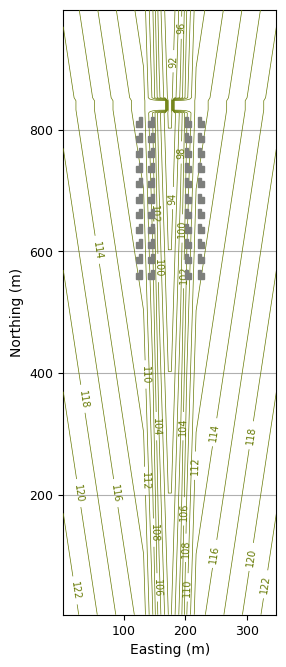

In [37]:
Fig1 = plt.figure()
Fig1.set_size_inches(2.75, 7.86)
ax11 = Fig1.add_subplot(1,1,1)
tp = ax11.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0 )
tl = ax11.clabel(tp, tp.levels, inline=True, fmt="%d", fontsize=7 )
ax11.set_ylabel( "Northing (m)", fontsize=10)
ax11.set_xlabel( "Easting (m)", fontsize=10)
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    pX, pY = tPoly.exterior.xy
    ax11.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0 )
    pCnt += 1
# end for
ax11.grid( visible=True, which='major', axis='y' )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

Now do the zoom in plot.

In [38]:
Obs_Cells = [ shapely.geometry.Polygon( ( ( 170.0, 830.0 ), ( 175, 830.0 ), (175.0, 835.0), (170.0, 835.0 ), 
                                          ( 170.0, 830.0 ), ) ), #0
               shapely.geometry.Polygon( ( ( 175.0, 830.0 ), ( 180, 830.0 ), (180.0, 835.0), (175.0, 835.0 ), 
                                          ( 175.0, 830.0 ), ) ), #1
            ]

In [39]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-ZoomIn_Topo.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-ZoomIn_Topo.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-ZoomIn_Topo.svg" ) )

In [40]:
ZmX = [105.0, 150.0, 200.0, 245.0]
ZmY = [500.0, 600.0, 700.0, 800.0, 900.0]

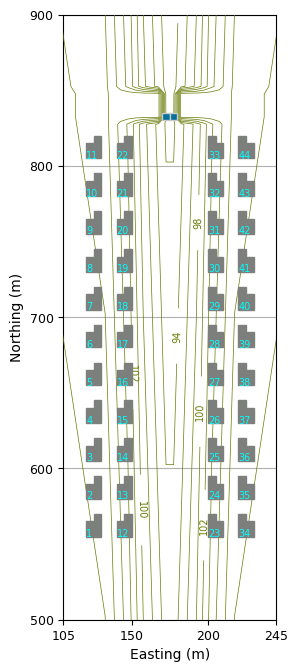

In [41]:
Fig1 = plt.figure()
Fig1.set_size_inches(2.75, 7.86)
ax11 = Fig1.add_subplot(1,1,1)
tp = ax11.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0 )
tl = ax11.clabel(tp, tp.levels, inline=True, fmt="%d", fontsize=7 )
ax11.set_ylabel( "Northing (m)", fontsize=10)
ax11.set_xlabel( "Easting (m)", fontsize=10)
ax11.set_xticks( ZmX )
ax11.set_yticks( ZmY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    zAnno = pCnt + 50.0
    pX, pY = tPoly.exterior.xy
    cCCoords = tPoly.representative_point().coords[:][0]
    labelstr = "%d" % (pCnt+1)
    ax11.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0 )
    ax11.text( cCCoords[0]-5.0, cCCoords[1]-5.0, labelstr, color='xkcd:cyan', fontsize=7, fontweight='normal', zorder=zAnno )
    pCnt += 1
# end for
oX1, oY1 = Obs_Cells[0].exterior.xy
ax11.fill( oX1, oY1, edgecolor='xkcd:silver', facecolor='xkcd:ocean blue', linewidth=1, zorder=zLev+2, alpha=1.0 )
oX2, oY2 = Obs_Cells[1].exterior.xy
ax11.fill( oX2, oY2, edgecolor='xkcd:silver', facecolor='xkcd:ocean blue', linewidth=1, zorder=zLev+2, alpha=1.0 )
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( (ZmX[0], ZmX[len(ZmX)-1]) )
ax11.set_ylim( (ZmY[0], ZmY[len(ZmY)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

Do a combined plot

In [42]:
NUMROWS * DY, NUMCOLS * DX

(1000.0, 350.0)

In [43]:
ZmY[len(ZmY)-1] - ZmY[0], ZmX[len(ZmX)-1] - ZmX[0]

(400.0, 140.0)

In [44]:
FlX = [0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0,]
FlY = [0.0, 200.0, 400.0, 600.0, 800.0, 1000.0, ]

In [45]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-2Pan_Topo.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-2Pan_Topo.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-2Pan_Topo.svg" ) )

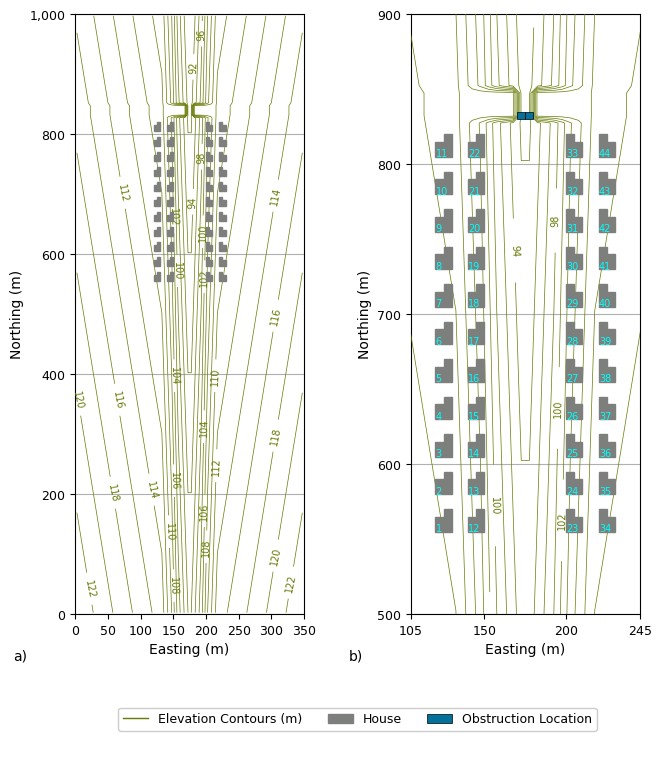

In [46]:
Fig1 = plt.figure(figsize=( 6.5, (19.0/2.54)), layout="constrained", )
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[10, 1], width_ratios=[1,1], wspace=0.05,
                           hspace=0.02, figure=Fig1, )
ax1 = Fig1.add_subplot(gs[0,0])
tp1 = ax1.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0 )
tl = ax1.clabel(tp1, tp1.levels, inline=True, fmt="%d", fontsize=7 )
ax1.set_ylabel( "Northing (m)", fontsize=10)
ax1.set_xlabel( "Easting (m)", fontsize=10)
ax1.set_xticks( FlX )
ax1.set_yticks( FlY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    pX, pY = tPoly.exterior.xy
    ax1.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0 )
    pCnt += 1
# end for
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( (FlX[0], FlX[len(FlX)-1]) )
ax1.set_ylim( (FlY[0], FlY[len(FlY)-1]) )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# now do the second one
ax2 = Fig1.add_subplot(gs[0,1])
tp2 = ax2.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0, )
t2 = ax2.clabel(tp2, tp2.levels, inline=True, fmt="%d", fontsize=7 )
ax2.set_ylabel( "Northing (m)", fontsize=10)
ax2.set_xlabel( "Easting (m)", fontsize=10)
ax2.set_xticks( ZmX )
ax2.set_yticks( ZmY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    zAnno = pCnt + 50.0
    pX, pY = tPoly.exterior.xy
    cCCoords = tPoly.representative_point().coords[:][0]
    labelstr = "%d" % (pCnt+1)
    bldPoly = ax2.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0,
                        label="House")
    ax2.text( cCCoords[0]-5.0, cCCoords[1]-5.0, labelstr, color='xkcd:cyan', fontsize=7, fontweight='normal', zorder=zAnno )
    pCnt += 1
# end for
oX1, oY1 = Obs_Cells[0].exterior.xy
obsPoly1 = ax2.fill( oX1, oY1, edgecolor='xkcd:black', facecolor='xkcd:ocean blue', linewidth=0.5, zorder=zLev+2, alpha=1.0,
                     label="Obstruction Location")
oX2, oY2 = Obs_Cells[1].exterior.xy
obsPoly2 = ax2.fill( oX2, oY2, edgecolor='xkcd:black', facecolor='xkcd:ocean blue', linewidth=0.5, zorder=zLev+2, alpha=1.0 )
ax2.grid( visible=True, which='major', axis='y' )
ax2.set_xlim( (ZmX[0], ZmX[len(ZmX)-1]) )
ax2.set_ylim( (ZmY[0], ZmY[len(ZmY)-1]) )
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# now do legend
tp2.collections[0].set_label('Elevation Contours (m)')
proxy = [ plt.Line2D([0],[0], color='xkcd:olive green', linewidth=1, label='Elevation Contours (m)') ]
handleP = [ proxy[0], bldPoly[0], obsPoly1[0], ]

ax3 = Fig1.add_subplot(gs[1,:])
ax3.legend( handles=handleP, loc='center', ncol=3, framealpha=1.0, fontsize=9)
ta = ax3.axis('off')
# add subplot ids
trans11 = mtransforms.ScaledTranslation(-45/72, -(6.2*75)/72, Fig1.dpi_scale_trans)
txt11 = ax1.text(0.0, 1.0, "a)", transform=ax1.transAxes+trans11, fontsize=10 )
trans22 = mtransforms.ScaledTranslation(-45/72, -(6.2*75)/72, Fig1.dpi_scale_trans)
txt22 = ax2.text(0.0, 1.0, "b)", transform=ax2.transAxes+trans22, fontsize=10 )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

## Cost Curve Plot

Plot the cost curve used to estimate damages. This is based on the FEMA NFIP Flood Damage Cost Calculator (https://www.floodsmart.gov/cost-flooding). From the Damage Cost Calculator use "estimated data for 5,000 sq.ft. two-story house. Assume the maximum value is $750,000.

The Damage Cost Calculator only goes to 48 inches (1.2192 m) of inundation depth. Assume that 108 inches (2.74320 m) is the inundation depth for total loss and linearly interpolate between 48 inches and 108 inches to fill out the curve.

A fourth degree polynomial was fit to the point data from NFIP Flood Damage Cost Calculator and linear interpolation. The best fit polynomial is given by the equation below for depth in meters, $y$, and cost in dollars, $x$. The $R^{2}$ values was 0.9974.

\begin{equation*}
    y = -72769x^{4}~+~414681x^{3}~-~678009x^{2}~+~498224x~+~37110
\end{equation*}

In [47]:
NFIP_Depth_m = [ 0.02540, 0.05080, 0.07620, 0.10160, 0.12700, 0.15240, 0.17780, 0.20320, 0.22860, 
                 0.25400, 0.27940, 0.30480, 0.60960, 0.91440, 1.21920, ]
NFIP_Cost_D = [  53454.00, 53564.00, 58448.00, 76707.00, 90496.00, 103505.00, 110174.00, 116843.00, 123512.00, 
                 130181.00, 136850.00, 143519.00, 171775.00, 185704.00, 203280.00, ] 
Max_Depth_m = [ 2.74320, ]
Max_Cost_D = [ 750000.0, ]
LInterp_Depth_m = [ 1.5240, 1.82880, 2.13360, 2.43840, ]
LInterp_Cost_D = [ 312624.0, 421968.0, 531312.0, 640656.0, ]

Best fit cost calculation function

In [48]:
ccA = -72769.0
ccB = 414681.0 
ccC = -678009.0 
ccD = 498224.0
ccE = 37110.0
MAX_COST = 750000.0

In [49]:
def costCalc( IDepth, ccA, ccB, ccC, ccD, ccE, MAX_COST ):
    """ Custom inundation damage cost curve calculation.
    
    Fourth degree polynomial with coefficients: A, B, C, D, E, and
    cost limited to MAX_COST.
    
    Args:
        IDepth (float): depth of inundation in meters
        ccA (float): A coefficient for x^4
        ccB (float): B coefficient for x^3
        ccC (float): C coefficient for x^2
        ccD (float): D coefficient for x^1
        ccE (float): E coefficient for x^0
        
    Returns:
        iCost (float): varies between 0.0 and MAX_COST
    """
    from math import pow
    # check for positive depth and extrapolation.
    if IDepth <= 0.0:
        return 0.0
    elif IDepth >= 2.75:
        return MAX_COST
    # end if
    # calculate the polynomial
    estCost = ( ( ccA * pow( IDepth, 4.0 ) ) + ( ccB * pow( IDepth, 3.0 ) ) + ( ccC * pow(IDepth, 2.0) ) +
                ( ccD * pow( IDepth, 1.0 ) ) + ccE )
    if estCost > MAX_COST:
        iCost = MAX_COST
    else:
        iCost = estCost
    # end if
    return iCost

In [50]:
2.75 / 0.1

27.5

In [51]:
NumCosts = int( 2.75 / 0.1 ) + 1
NumCosts

28

In [52]:
Depth_Inds = [ x*0.1 for x in range(NumCosts) ]
Depth_Inds[-5:]

[2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7]

In [53]:
Cost_Ests = [ costCalc( x, ccA, ccB, ccC, ccD, ccE, MAX_COST ) for x in Depth_Inds ]
Cost_Ests[25:]

[681965.3125, 712216.1615999986, 734552.3000999999]

In [54]:
Cost_Ests.extend( [MAX_COST,] )

In [55]:
Cost_Ests[25:]

[681965.3125, 712216.1615999986, 734552.3000999999, 750000.0]

In [56]:
Depth_Inds.extend( [2.75,] )

In [57]:
PlotX = [ 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, ]
PlotY = [ 0, 200000, 400000, 600000, 800000, ]

In [58]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Damage_Cost_Curve.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Damage_Cost_Curve.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Damage_Cost_Curve.svg" ) )

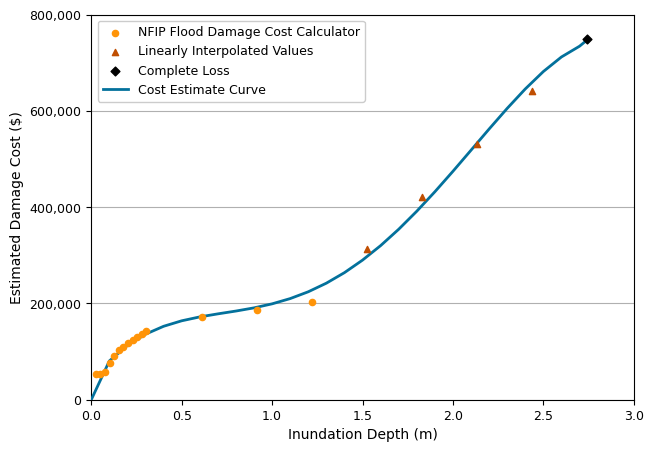

In [59]:
Fig1 = plt.figure()
Fig1.set_size_inches(7.0, 5.0)
ax11 = Fig1.add_subplot(1,1,1)
nfip = ax11.scatter( NFIP_Depth_m, NFIP_Cost_D, s=20, c='xkcd:tangerine', edgecolor='xkcd:tangerine', marker='o', 
                      label="NFIP Flood Damage Cost Calculator", zorder=10, )
interp = ax11.scatter( LInterp_Depth_m, LInterp_Cost_D, s=20, c='xkcd:burnt orange', edgecolor='xkcd:burnt orange',
                        marker='^', label="Linearly Interpolated Values", zorder=9, )
maxC = ax11.scatter( Max_Depth_m, Max_Cost_D, s=20, c='xkcd:black', edgecolor='xkcd:black', marker='D', 
                      label="Complete Loss", zorder=12, )
cLine, = ax11.plot( Depth_Inds, Cost_Ests, linestyle='-', linewidth=2, color='xkcd:ocean blue',
                    label="Cost Estimate Curve", zorder=5, )
ax11.set_ylabel( "Estimated Damage Cost ($)", fontsize=10)
ax11.set_xlabel( "Inundation Depth (m)", fontsize=10)
ax11.set_xticks( PlotX )
ax11.set_yticks( PlotY )
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( (PlotX[0], PlotX[len(PlotX)-1]) )
ax11.set_ylim( (PlotY[0], PlotY[len(PlotY)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
leg1 = ax11.legend(loc='upper left', ncol=1, framealpha=1.0, fontsize=9)
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

## Process Synthetic Weather

In [60]:
InFiler = r'C:\Users\nmart\Dropbox\MyPapers\Flood_Risk_PRA\Flood_Risk_Model\Frio_Synthetic_Weather\Processed_Outputs\All_Events_Summary.xlsx'
FullEventsDF = pd.read_excel( InFiler, sheet_name="Events", header=0, index_col=0, parse_dates=[2] )

In [61]:
display( HTML( FullEventsDF.describe().to_html() ) ) 

,RealNum,Precip_mm,Discharge_cms
count,3583.000000,3583.000000,3583.000000
mean,500.158805,278.532065,212.439716
std,288.938843,58.823586,44.865449
min,1.000000,236.024506,180.018692
25%,252.000000,242.891487,185.256218
50%,496.000000,251.877472,192.109940
75%,751.000000,286.403793,218.443581
max,1000.000000,656.915161,501.036987


In [62]:
ListUniqueReals = list( FullEventsDF["RealNum"].unique() )
len(ListUniqueReals)

999

In [63]:
ListUniqueReals[:5]

[1, 2, 3, 4, 5]

In [64]:
iCnt = 0
for iI in range(1,1001):
    if ListUniqueReals[iCnt] != iI:
        print("Missing realization %d" % iI)
        continue
    # end if
    iCnt += 1
# end for

Missing realization 720


In [65]:
df2 = FullEventsDF.groupby(['RealNum'])['RealNum'].count()

In [66]:
CountsDict = { "RealNum" : df2.index,
               "Count" : df2.values, }

In [67]:
CountsDF = pd.DataFrame( data=CountsDict )

In [68]:
display( HTML( CountsDF.head().to_html() ) )

,RealNum,Count
0,1,3
1,2,3
2,3,3
3,4,3
4,5,5


In [69]:
display( HTML( CountsDF.tail().to_html() ) )

,RealNum,Count
994,996,4
995,997,4
996,998,5
997,999,2
998,1000,4


In [70]:
CountsDF.loc[999] = [ 720, 0 ]

In [71]:
CountsDF.sort_values( "RealNum", inplace=True, ignore_index=True )

In [72]:
display( HTML( CountsDF.head().to_html() ) )

,RealNum,Count
0,1,3
1,2,3
2,3,3
3,4,3
4,5,5


In [73]:
display( HTML( CountsDF.tail().to_html() ) )

,RealNum,Count
995,996,4
996,997,4
997,998,5
998,999,2
999,1000,4


In [74]:
#xbins = np.array( [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,] )
xbins = np.array( [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5,] )
hxP = [ 0.0, 2.0, 4.0, 6.0, 8.0, 10.0 ]
hyP = [ 0.0, 0.1, 0.2, 0.3 ]

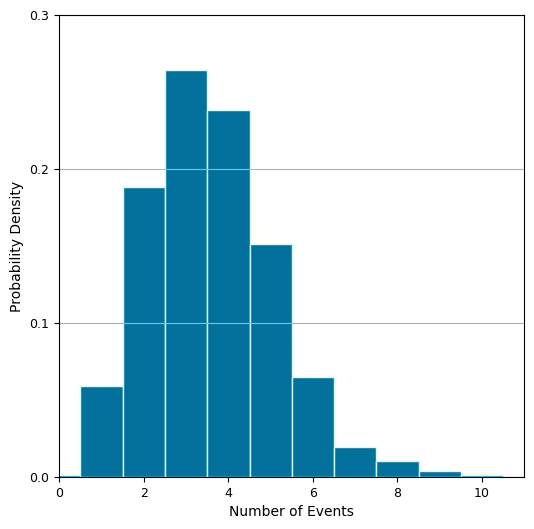

In [75]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
hist = ax11.hist( CountsDF["Count"].to_numpy(dtype=np.int32), bins=xbins, density=True, 
                  facecolor='xkcd:ocean blue', edgecolor='xkcd:pale blue', linewidth=1 )
ax11.set_ylabel( "Probability Density", fontsize=10)
ax11.set_xlabel( "Number of Events", fontsize=10)
ax11.set_xticks( hxP )
ax11.set_yticks( hyP )
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( ( hxP[0], 11 ) )
ax11.set_ylim( ( hyP[0], hyP[len(hyP)-1] ) )
#ax11.legend( loc="upper right" )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [76]:
npPrecipDepths = FullEventsDF["Precip_mm"].to_numpy(dtype=np.float32)

In [77]:
np.percentile( npPrecipDepths, 50 )

251.87747192382812

In [78]:
np.percentile( npPrecipDepths, 86.6 )

343.13779162597655

In [79]:
np.percentile( npPrecipDepths, 99.08 )

497.8007430908202

In [80]:
plotPercs = [ x for x in range(0,101,1) ]
plotPercs[:5]

[0, 1, 2, 3, 4]

In [81]:
cumPercPDepth = np.percentile( npPrecipDepths, plotPercs )

In [82]:
cumPercPDepth[:5]

array([236.02450562, 236.3711441 , 236.68741272, 237.01951202,
       237.36716064])

In [83]:
cumPercPDepth[-5:]

array([427.90469116, 446.04124084, 465.24623413, 493.78793518,
       656.91516113])

In [84]:
plotDPercs = [ float(x)/100.0 for x in plotPercs ]

In [85]:
plotPercs[60], plotPercs[80]

(60, 80)

In [87]:
cumPercPDepth[60], cumPercPDepth[80]

(261.66412353515625, 302.90692749023475)

In [88]:
cdX = [200.0, 300.0, 400.0, 500.0, 600.0, 700.0 ]
cdY = [0.0, 0.25, 0.5, 0.75, 1.0,]

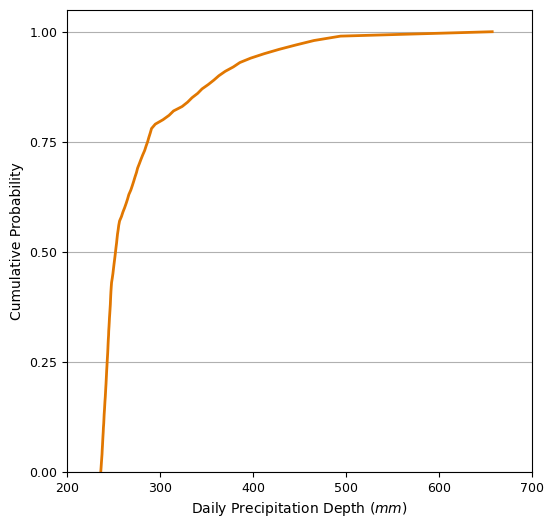

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
cumperc, = ax11.plot( cumPercPDepth, plotDPercs, linewidth=2, linestyle='-', color='xkcd:pumpkin', )
ax11.set_ylabel( "Cumulative Probability", fontsize=10)
ax11.set_xlabel( "Daily Precipitation Depth ($mm$)", fontsize=10)
ax11.set_xticks( cdX )
ax11.set_yticks( cdY )
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( ( cdX[0], cdX[len(cdX)-1] ) )
ax11.set_ylim( ( cdY[0], 1.05 ) )
#ax11.legend( loc="upper right" )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )

Now do a plot with two panels

In [90]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-PrecipEvent_Summary.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-PrecipEvent_Summary.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-PrecipEvent_Summary.svg" ) )

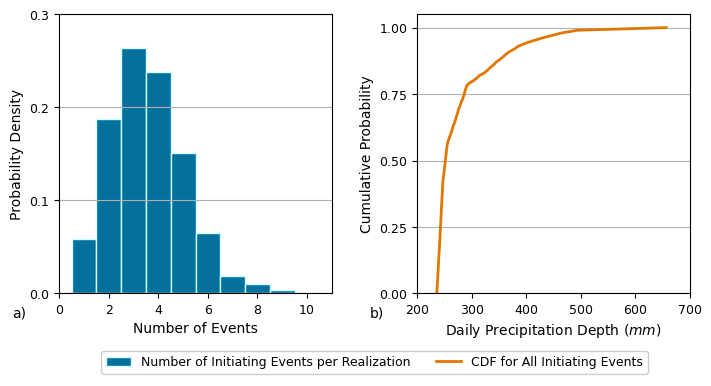

In [91]:
Fig1 = plt.figure(figsize=( 7.0, 3.75), layout="constrained", )
gs = mpl.gridspec.GridSpec( 2, 2, height_ratios=[10, 1], width_ratios=[1,1], wspace=0.04,
                            hspace=0.02, figure=Fig1, )
# normalized histogram/density
ax1 = Fig1.add_subplot(gs[0,0])
hist = ax1.hist( CountsDF["Count"].to_numpy(dtype=np.int32), bins=xbins, density=True, 
                  facecolor='xkcd:ocean blue', edgecolor='xkcd:pale blue', label="Number of Initiating Events per Realization",
                  linewidth=1 )
ax1.set_ylabel( "Probability Density", fontsize=10)
ax1.set_xlabel( "Number of Events", fontsize=10)
ax1.set_xticks( hxP )
ax1.set_yticks( hyP )
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( ( hxP[0], 11 ) )
ax1.set_ylim( ( hyP[0], hyP[len(hyP)-1] ) )
#ax1.legend( loc="upper right" )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
# Empirical CDF
ax2 = Fig1.add_subplot(gs[0,1])
cumperc, = ax2.plot( cumPercPDepth, plotDPercs, linewidth=2, linestyle='-', color='xkcd:pumpkin', 
                     label="CDF for All Initiating Events", )
ax2.set_ylabel( "Cumulative Probability", fontsize=10)
ax2.set_xlabel( "Daily Precipitation Depth ($mm$)", fontsize=10)
ax2.set_xticks( cdX )
ax2.set_yticks( cdY )
ax2.grid( visible=True, which='major', axis='y' )
ax2.set_xlim( ( cdX[0], cdX[len(cdX)-1] ) )
ax2.set_ylim( ( cdY[0], 1.05 ) )
#ax2.legend( loc="upper right" )
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
# Legend
handleP = [ hist[2][0], cumperc ]
ax3 = Fig1.add_subplot(gs[1,:])
ax3.legend( handles=handleP, loc='center', ncol=2, framealpha=1.0, fontsize=9)
ta = ax3.axis('off')
# add subplot ids
trans11 = mtransforms.ScaledTranslation(-34/72, -(2.9*75)/72, Fig1.dpi_scale_trans)
txt11 = ax1.text(0.0, 1.0, "a)", transform=ax1.transAxes+trans11, fontsize=10 )
trans22 = mtransforms.ScaledTranslation(-34/72, -(2.9*75)/72, Fig1.dpi_scale_trans)
txt22 = ax2.text(0.0, 1.0, "b)", transform=ax2.transAxes+trans22, fontsize=10 )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

## Obstruction Distribution

In [92]:
OBS_AVAIL_HEIGHT = ( (105.033-91.700), (105.033-91.700) )
OBS_AVAIL_HEIGHT[0]

13.332999999999998

In [93]:
probs = np.linspace( 0.01, 1.00, 1000 )
len( probs )

1000

In [94]:
depths = np.linspace( 0.1, 100.0, 1000 )
len(depths)

1000

Theoretical Distribution

In [95]:
GEV_17 = sstats.genextreme( -0.3, loc=0.62, scale=1.0 )

In [96]:
pdfProb = GEV_17.pdf( depths )
cdfProb = GEV_17.cdf( depths )

Empirical distribution from sampling

In [97]:
InXLSX1 = os.path.normpath( os.path.join( IN_DIR3, "Results", "Summary_CR1000_NoObs.xlsx" ) )
InXLSX2 = os.path.normpath( os.path.join( IN_DIR4, "Results", "Summary_CR1000_Obs.xlsx" ) )

In [98]:
SummNoObsDF = pd.read_excel( InXLSX1, sheet_name="Summary", header=0, index_col=0, parse_dates=[3,], )
SummObsDF = pd.read_excel( InXLSX2, sheet_name="Summary", header=0, index_col=0, parse_dates=[3,], )

In [99]:
SummDF = pd.concat( [SummNoObsDF, SummObsDF,], ignore_index=True, )

In [100]:
display( HTML( SummDF.head().to_html() ) )

,Realization,Flood Num.,Date,Precip_mm,Discharge_cms,Obstruction_Depth_m,Max_Water_Depth_m,Max_Flood_Depth_m,Max_U_mps,Max_V_mps
0,1,1,2044-01-05,246.863785,188.285934,0.0,1.566694,0.0,1.337224,10.826838
1,1,2,2050-01-05,242.915573,185.274597,0.0,1.432162,0.0,1.298571,10.708450
2,1,3,2063-01-06,254.184647,193.869644,0.0,1.832435,0.0,1.385445,10.524681
3,2,1,2048-02-26,245.518372,187.259781,0.0,1.518405,0.0,1.322711,10.784780
4,2,2,2051-01-10,248.133163,189.254105,0.0,1.606060,0.0,1.347408,10.859875


In [101]:
display( HTML( SummDF.describe().to_html() ) )

,Realization,Flood Num.,Precip_mm,Discharge_cms,Obstruction_Depth_m,Max_Water_Depth_m,Max_Flood_Depth_m,Max_U_mps,Max_V_mps
count,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000
mean,500.158805,2.607870,278.532065,212.439716,0.813690,2.657028,0.692414,1.573992,11.326521
std,288.918679,1.486112,58.819481,44.862318,1.752522,1.610976,1.309184,0.639368,0.936398
min,1.000000,1.000000,236.024506,180.018692,0.000000,1.210083,0.000000,0.845024,10.113132
25%,252.000000,1.000000,242.884541,185.250919,0.000000,1.515423,0.000000,1.287897,10.713619
50%,496.000000,2.000000,251.877472,192.109940,0.000000,1.965030,0.000000,1.362953,10.876514
75%,751.000000,3.000000,286.426125,218.460613,0.991446,3.069174,0.619173,1.572451,11.525706
max,1000.000000,10.000000,656.915161,501.036987,35.079269,8.585639,6.135637,9.203288,15.439378


In [102]:
TotFloods = len( SummDF )
TotFloods

7166

In [103]:
npAllObsDeps = SummDF["Obstruction_Depth_m"].to_numpy(dtype=np.float32)

In [104]:
npCDFObs = np.quantile( npAllObsDeps, probs )
npCDFObs[-5:]

array([11.07180209, 11.8769457 , 13.28650576, 17.57645736, 35.07926941])

In [105]:
len( probs )

1000

In [106]:
Depth_Ticks = [0.0, 3.0, 6.0, 9.0, 12.0, 15.0, ]
CProb_Ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, ]
PProb_Ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,]
obins = np.array( [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, ] )

In [107]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Obstruction_Distributions.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Obstruction_Distributions.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Obstruction_Distributions.svg" ) )

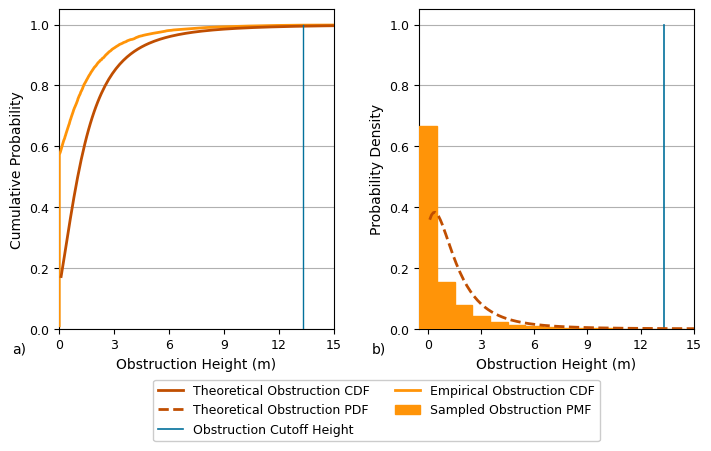

In [108]:
Fig1 = plt.figure(figsize=( 7.0, 4.4), layout="constrained", )
gs = mpl.gridspec.GridSpec( 2, 2, height_ratios=[10, 1], width_ratios=[1,1], wspace=0.04,
                            hspace=0.02, figure=Fig1, )
# CDF
ax1 = Fig1.add_subplot(gs[0,0])
cdf, = ax1.plot( depths, cdfProb, linestyle='-', linewidth=2, color='xkcd:burnt orange', label="Theoretical Obstruction CDF", zorder=5, )
ecdf, = ax1.plot( npCDFObs, probs, linestyle='-', linewidth=2, color='xkcd:tangerine', label="Empirical Obstruction CDF", zorder=4, )
obsC, = ax1.plot( OBS_AVAIL_HEIGHT, [0.0, 1.0], linestyle='-', linewidth=1, color='xkcd:ocean blue', label="Obstruction Cutoff Height", 
                  zorder=7, )
ax1.set_ylabel( "Cumulative Probability", fontsize=10)
ax1.set_xlabel( "Obstruction Height (m)", fontsize=10)
ax1.set_xticks( Depth_Ticks )
ax1.set_yticks( CProb_Ticks )
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( (Depth_Ticks[0], Depth_Ticks[len(Depth_Ticks)-1]) )
#ax1.set_ylim( (CProb_Ticks[0], CProb_Ticks[len(CProb_Ticks)-1]) )
ax1.set_ylim( (CProb_Ticks[0], 1.05) )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
# PDF
ax2 = Fig1.add_subplot(gs[0,1])
pdf, = ax2.plot( depths, pdfProb, linestyle='dashed', linewidth=2, color='xkcd:burnt orange', label="Theoretical Obstruction PDF", zorder=8, )
hist = ax2.hist( npAllObsDeps, bins=obins, density=True, facecolor='xkcd:tangerine', edgecolor='xkcd:tangerine', 
                 label="Sampled Obstruction PMF", linewidth=1, zorder=4)
obsC, = ax2.plot( OBS_AVAIL_HEIGHT, [0.0, 1.0], linestyle='-', linewidth=1.2, 
                  color='xkcd:ocean blue', label="Obstruction Cutoff Height",  zorder=7, )
ax2.set_ylabel( "Probability Density", fontsize=10)
ax2.set_xlabel( "Obstruction Height (m)", fontsize=10)
ax2.set_xticks( Depth_Ticks )
#ax2.set_yticks( PProb_Ticks )
ax2.set_yticks( CProb_Ticks )
ax2.grid( visible=True, which='major', axis='y' )
#ax2.set_xlim( (Depth_Ticks[0], Depth_Ticks[len(Depth_Ticks)-1]) )
ax2.set_xlim( (-0.5, Depth_Ticks[len(Depth_Ticks)-1]) )
ax2.set_ylim( (CProb_Ticks[0], 1.05 ) )
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
# Legend
handleP = [ cdf, pdf, obsC, ecdf, hist[2][0],]
ax3 = Fig1.add_subplot(gs[1,:])
ax3.legend( handles=handleP, loc='center', ncol=2, framealpha=1.0, fontsize=9)
ta = ax3.axis('off')
# add subplot ids
trans11 = mtransforms.ScaledTranslation(-34/72, -(3.3*75)/72, Fig1.dpi_scale_trans)
txt11 = ax1.text(0.0, 1.0, "a)", transform=ax1.transAxes+trans11, fontsize=10 )
trans22 = mtransforms.ScaledTranslation(-34/72, -(3.3*75)/72, Fig1.dpi_scale_trans)
txt22 = ax2.text(0.0, 1.0, "b)", transform=ax2.transAxes+trans22, fontsize=10 )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

In [109]:
probs[749], npCDFObs[749]

(0.7522522522522523, 1.0062286698066443)

In [110]:
GEV_17.cdf( 10.0 ), GEV_17.cdf( OBS_AVAIL_HEIGHT[0] ), GEV_17.cdf( 1.0 ) 

(0.988530044947748, 0.9947051035818238, 0.49769093633632294)

## Process Realizations Results

In [111]:
InPYK1 = os.path.normpath( os.path.join( IN_DIR3, "Results", "FullHouseRealDF_noObs.pkl" ) )
InPYK2 = os.path.normpath( os.path.join( IN_DIR4, "Results", "FullHouseRealDF_Obs.pkl" ) )

In [112]:
FullNoObsDF = pd.read_pickle( InPYK1, compression='zip', )
FullObsDF = pd.read_pickle( InPYK2, compression='zip', )

In [113]:
FullDF = pd.concat( [ FullNoObsDF, FullObsDF ], ignore_index=True, )

In [114]:
display( HTML( FullDF.head().to_html() ) )

,Row,Column,Topo_m,FloorEl_m,FloorHeight_m,WaterDepth_m,FloodDepth_m,Realization,House_Ind,Cost_Estimate
0,114,27,109.349998,109.633003,0.283002,0.0,0.0,1,1,0.0
1,119,27,109.099998,109.383003,0.283002,0.0,0.0,1,2,0.0
2,124,27,108.849998,109.133003,0.283002,0.0,0.0,1,3,0.0
3,129,27,108.599998,108.883003,0.283002,0.0,0.0,1,4,0.0
4,134,27,108.349998,108.633003,0.283002,0.0,0.0,1,5,0.0


In [115]:
OvNoObsDF = pd.read_excel( InXLSX1, sheet_name="Overview", header=0, index_col=0, )
OvObsDF = pd.read_excel( InXLSX2, sheet_name="Overview", header=0, index_col=0, )

In [116]:
OvNoObsDF["TC x M"] = OvNoObsDF["Total Cost"] * (1.0/1000000.0)
OvObsDF["TC x M"] = OvObsDF["Total Cost"] * (1.0/1000000.0)

In [117]:
OvDF = pd.concat( [OvNoObsDF, OvObsDF,], ignore_index=True, )

In [118]:
display( HTML( OvDF.head().to_html() ) )

,Climate Realization,Total Cost,TC x M
0,1,0.000,0.000000
1,2,426701.875,0.426702
2,3,0.000,0.000000
3,4,1507379.500,1.507379
4,5,2211425.500,2.211425


In [119]:
S2 = OvDF.groupby(['Climate Realization'])['Total Cost'].sum()

In [120]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [121]:
OvSumDF = pd.DataFrame( data=DataDict, )

In [122]:
OvSumDF["TC x M"] = OvSumDF["Total Cost"] * (1.0/1000000.0)

In [123]:
display( HTML( OvSumDF.describe().to_html() ) )

,Realization,Total Cost,TC x M
count,979.000000,9.790000e+02,979.000000
mean,499.775281,6.658600e+06,6.658600
std,288.869970,8.561370e+06,8.561370
min,1.000000,0.000000e+00,0.000000
25%,250.000000,2.237543e+05,0.223754
50%,499.000000,2.460997e+06,2.460997
75%,750.000000,1.155111e+07,11.551111
max,999.000000,5.565600e+07,55.655996


In [124]:
display( HTML( OvObsDF.describe().to_html() ) )

,Climate Realization,Total Cost,TC x M
count,979.000000,9.790000e+02,979.000000
mean,499.775281,7.435622e+06,7.435622
std,288.869970,9.152991e+06,9.152991
min,1.000000,0.000000e+00,0.000000
25%,250.000000,3.265430e+05,0.326543
50%,499.000000,3.231418e+06,3.231418
75%,750.000000,1.358205e+07,13.582051
max,999.000000,5.762478e+07,57.624784


In [125]:
display( HTML( OvNoObsDF.describe().to_html() ) )

,Climate Realization,Total Cost,TC x M
count,979.000000,9.790000e+02,979.000000
mean,499.775281,5.881578e+06,5.881578
std,288.869970,8.196832e+06,8.196832
min,1.000000,0.000000e+00,0.000000
25%,250.000000,0.000000e+00,0.000000
50%,499.000000,1.275181e+06,1.275181
75%,750.000000,1.041440e+07,10.414403
max,999.000000,5.368721e+07,53.687208


In [126]:
WasFlooded = lambda TC: 1 if TC > 0.0 else 0
FullDF["Flood Count"] = FullDF.apply( lambda row: WasFlooded(row["Cost_Estimate"]), axis=1, )

In [127]:
display( HTML( FullDF.describe().to_html() ) )

,Row,Column,Topo_m,FloorEl_m,FloorHeight_m,WaterDepth_m,FloodDepth_m,Realization,House_Ind,Cost_Estimate,Flood Count
count,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000,315304.000000
mean,139.000000,35.500000,104.349998,105.716503,1.366501,0.736418,0.184525,500.158805,22.500000,42339.184205,0.105349
std,15.811413,6.800746,3.832434,2.781231,1.083502,1.388343,0.679950,288.898978,12.698445,149013.016412,0.307003
min,114.000000,27.000000,99.349998,101.800003,0.283002,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,124.000000,30.000000,100.599998,103.050003,0.283002,0.000000,0.000000,252.000000,11.750000,0.000000,0.000000
50%,139.000000,35.500000,104.349998,105.716503,1.366501,0.000000,0.000000,496.000000,22.500000,0.000000,0.000000
75%,154.000000,41.000000,108.099998,108.383003,2.450001,1.022842,0.000000,751.000000,33.250000,0.000000,0.000000
max,164.000000,44.000000,109.349998,109.633003,2.450001,8.585639,6.135637,1000.000000,44.000000,750000.000000,1.000000


In [128]:
S1 = FullDF.groupby(['House_Ind'])['Flood Count'].sum()
S2 = FullDF.groupby(['House_Ind'])['Cost_Estimate'].sum()

In [129]:
DataDict = { "House" : S1.index,
             "Count" : S1.values,
             "Percent Flooded" : (S1.values * (1.0/TotFloods)),
             "Total Cost" : S2.values, }

In [130]:
HouseSummDF = pd.DataFrame( data=DataDict, )

In [131]:
HouseSummDF["TC x M"] = HouseSummDF["Total Cost"] * (1.0/1000000.0)

In [132]:
display( HTML( HouseSummDF.head().to_html() ) )

,House,Count,Percent Flooded,Total Cost,TC x M
0,1,0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0
2,3,0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.0
4,5,0,0.0,0.0,0.0


In [133]:
display( HTML( HouseSummDF.tail().to_html() ) )

,House,Count,Percent Flooded,Total Cost,TC x M
39,40,0,0.000000,0.000000e+00,0.000000
40,41,0,0.000000,0.000000e+00,0.000000
41,42,2,0.000279,1.353857e+05,0.135386
42,43,7,0.000977,7.965828e+05,0.796583
43,44,15,0.002093,1.840051e+06,1.840051


In [134]:
display( HTML( HouseSummDF.describe().to_html() ) )

,House,Count,Percent Flooded,Total Cost,TC x M
count,44.000000,44.000000,44.000000,4.400000e+01,44.000000
mean,22.500000,754.931818,0.105349,3.034026e+08,303.402594
std,12.845233,854.357161,0.119224,3.512853e+08,351.285267
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,11.750000,0.000000,0.000000,0.000000e+00,0.000000
50%,22.500000,432.000000,0.060285,1.301611e+08,130.161119
75%,33.250000,1377.250000,0.192192,5.836536e+08,583.653594
max,44.000000,2693.000000,0.375802,1.051281e+09,1051.280793


In [135]:
Depth_Ticks = [0.0, 3.0, 6.0, 9.0, 12.0, 15.0, ]
CProb_Ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, ]
House_Ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,]
CHouse_Ticks = [0.0, 0.1, 0.2, 0.3, 0.4,]

In [136]:
bWidth = 0.80

In [137]:
House_Inds = list( HouseSummDF["House"].to_numpy(dtype=np.int32) )
#bPlotX = [ x-(0.5*bWidth) for x in House_Inds ]
bPlotX = [ x for x in House_Inds ]

In [138]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-FloodCounts_byHouse.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-FloodCounts_byHouse.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-FloodCounts_byHouse.svg" ) )

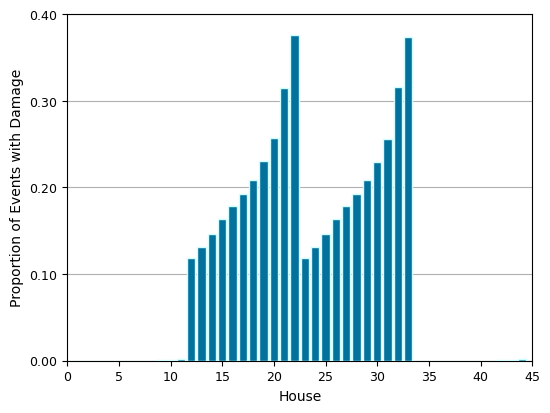

In [139]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 4.5)
ax1 = Fig1.add_subplot(1,1,1)
bars = ax1.bar( bPlotX, HouseSummDF["Percent Flooded"].to_numpy(dtype=np.float32),
                 width=bWidth, color='xkcd:ocean blue', edgecolor='xkcd:pale blue',
                 label="Proportion of events with inundation and damage", zorder=5, )
ax1.set_ylabel( "Proportion of Events with Damage", fontsize=10)
ax1.set_xlabel( "House", fontsize=10)
ax1.set_xticks( House_Ticks )
ax1.set_yticks( CHouse_Ticks )
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( (House_Ticks[0], House_Ticks[len(House_Ticks)-1]) )
ax1.set_ylim( (CHouse_Ticks[0], CHouse_Ticks[len(CHouse_Ticks)-1]) )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

Need to determine the Damage Cost distribution for drop 2 and drop 4.
- Drop 2: 22 and 33
- Drop 4: 21, 22 and 32, 33

In [140]:
Drop2List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
              23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop4List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15, 16, 17, 18, 19, 20,
              23, 24, 25, 26, 27, 28, 29, 30, 31,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop6List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15, 16, 17, 18, 19,
              23, 24, 25, 26, 27, 28, 29, 30,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop8List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15, 16, 17, 18,
              23, 24, 25, 26, 27, 28, 29,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop10List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15, 16, 17,
              23, 24, 25, 26, 27, 28,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop12List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15, 16,
              23, 24, 25, 26, 27,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop14List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14, 15,
              23, 24, 25, 26,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop16List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13, 14,
              23, 24, 25,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
Drop18List = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
              12, 13,
              23, 24,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, ]
len( Drop2List ), len( Drop4List )

(42, 40)

In [141]:
FullD2DF = FullDF[FullDF["House_Ind"].isin(Drop2List)].copy()
len(FullD2DF), len(FullDF)

(300972, 315304)

In [142]:
(len(FullDF) - len(FullD2DF))/TotFloods

2.0

In [143]:
S2 = FullD2DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [144]:
S2.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', name='Realization', length=999)

In [145]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : ( S2.values * 0.5 ), }

In [146]:
OvD2DF = pd.DataFrame( data=DataDict, )

In [147]:
OvD2DF["TC x M"] = OvD2DF["Total Cost"] * (1.0/1000000.0)

In [148]:
display( HTML( OvD2DF.head().to_html() ) )

,Realization,Total Cost,TC x M
0,1,0.000000e+00,0.000000
1,2,4.242028e+05,0.424203
2,3,0.000000e+00,0.000000
3,4,1.261385e+06,1.261385
4,5,2.323113e+06,2.323113


In [149]:
display( HTML( OvD2DF.tail().to_html() ) )

,Realization,Total Cost,TC x M
994,996,5.571567e+05,0.557157
995,997,1.457982e+07,14.579818
996,998,1.052629e+07,10.526289
997,999,9.688878e+04,0.096889
998,1000,2.153223e+06,2.153223


In [150]:
display( HTML( OvD2DF.describe().to_html() ) )

,Realization,Total Cost,TC x M
count,999.000000,9.990000e+02,999.000000
mean,500.280280,5.631702e+06,5.631702
std,288.880469,7.565781e+06,7.565781
min,1.000000,0.000000e+00,0.000000
25%,250.500000,2.503049e+04,0.025030
50%,500.000000,1.775760e+06,1.775760
75%,750.500000,9.810005e+06,9.810005
max,1000.000000,4.887701e+07,48.877011


In [151]:
FullD4DF = FullDF[FullDF["House_Ind"].isin(Drop4List)].copy()
len(FullD4DF), len(FullDF)

(286640, 315304)

In [152]:
(len(FullDF) - len(FullD4DF))/TotFloods

4.0

In [153]:
S2 = FullD4DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [154]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [155]:
OvD4DF = pd.DataFrame( data=DataDict, )

In [156]:
OvD4DF["TC x M"] = OvD4DF["Total Cost"] * (1.0/1000000.0)

In [157]:
display( HTML( OvD4DF.head().to_html() ) )

,Realization,Total Cost,TC x M
0,1,0.000000e+00,0.000000
1,2,1.854461e+05,0.185446
2,3,0.000000e+00,0.000000
3,4,8.770922e+05,0.877092
4,5,1.743228e+06,1.743228


In [158]:
display( HTML( OvD4DF.tail().to_html() ) )

,Realization,Total Cost,TC x M
994,996,2.806832e+05,0.280683
995,997,1.307982e+07,13.079818
996,998,9.026289e+06,9.026289
997,999,0.000000e+00,0.000000
998,1000,1.575879e+06,1.575879


In [159]:
display( HTML( OvD4DF.describe().to_html() ) )

,Realization,Total Cost,TC x M
count,999.000000,9.990000e+02,999.000000
mean,500.280280,4.713256e+06,4.713256
std,288.880469,6.577638e+06,6.577638
min,1.000000,0.000000e+00,0.000000
25%,250.500000,0.000000e+00,0.000000
50%,500.000000,1.116116e+06,1.116116
75%,750.500000,8.024503e+06,8.024503
max,1000.000000,4.251959e+07,42.519593


In [160]:
FullD6DF = FullDF[FullDF["House_Ind"].isin(Drop6List)].copy()
len(FullD6DF), len(FullDF)

(272308, 315304)

In [161]:
S2 = FullD6DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [162]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [163]:
OvD6DF = pd.DataFrame( data=DataDict, )

In [164]:
OvD6DF["TC x M"] = OvD6DF["Total Cost"] * (1.0/1000000.0)

In [165]:
FullD8DF = FullDF[FullDF["House_Ind"].isin(Drop8List)].copy()
len(FullD8DF), len(FullDF)

(257976, 315304)

In [166]:
S2 = FullD8DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [167]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [168]:
OvD8DF = pd.DataFrame( data=DataDict, )

In [169]:
OvD8DF["TC x M"] = OvD8DF["Total Cost"] * (1.0/1000000.0)

In [170]:
FullD10DF = FullDF[FullDF["House_Ind"].isin(Drop10List)].copy()
len(FullD6DF), len(FullDF)

(272308, 315304)

In [171]:
S2 = FullD10DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [172]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [173]:
OvD10DF = pd.DataFrame( data=DataDict, )

In [174]:
OvD10DF["TC x M"] = OvD10DF["Total Cost"] * (1.0/1000000.0)

In [175]:
FullD12DF = FullDF[FullDF["House_Ind"].isin(Drop12List)].copy()
len(FullD12DF), len(FullDF)

(229312, 315304)

In [176]:
S2 = FullD12DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [177]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [178]:
OvD12DF = pd.DataFrame( data=DataDict, )

In [179]:
OvD12DF["TC x M"] = OvD12DF["Total Cost"] * (1.0/1000000.0)

In [180]:
FullD14DF = FullDF[FullDF["House_Ind"].isin(Drop14List)].copy()
len(FullD14DF), len(FullDF)

(214980, 315304)

In [181]:
S2 = FullD14DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [182]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [183]:
OvD14DF = pd.DataFrame( data=DataDict, )

In [184]:
OvD14DF["TC x M"] = OvD14DF["Total Cost"] * (1.0/1000000.0)

In [185]:
FullD16DF = FullDF[FullDF["House_Ind"].isin(Drop16List)].copy()
len(FullD16DF), len(FullDF)

(200648, 315304)

In [186]:
S2 = FullD16DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [187]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [188]:
OvD16DF = pd.DataFrame( data=DataDict, )

In [189]:
OvD16DF["TC x M"] = OvD16DF["Total Cost"] * (1.0/1000000.0)

In [190]:
FullD18DF = FullDF[FullDF["House_Ind"].isin(Drop18List)].copy()
len(FullD18DF), len(FullDF)

(186316, 315304)

In [191]:
S2 = FullD18DF.groupby(['Realization'])['Cost_Estimate'].sum()

In [192]:
DataDict = { "Realization" : S2.index,
             "Total Cost" : (S2.values * 0.5), }

In [193]:
OvD18DF = pd.DataFrame( data=DataDict, )

In [194]:
OvD18DF["TC x M"] = OvD18DF["Total Cost"] * (1.0/1000000.0)

In [195]:
npOvTCt = OvSumDF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvTCt = np.quantile( npOvTCt, probs )

In [196]:
npOvNoObsTCt = OvNoObsDF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvNoObsTCt = np.quantile( npOvNoObsTCt, probs )

In [197]:
len( npCDFOvNoObsTCt )

1000

In [198]:
npOvObsTCt = OvObsDF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvObsTCt = np.quantile( npOvObsTCt, probs )

In [199]:
npOvD2TCt = OvD2DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD2TCt = np.quantile( npOvD2TCt, probs )

In [200]:
npOvD4TCt = OvD4DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD4TCt = np.quantile( npOvD4TCt, probs )

In [201]:
npOvD6TCt = OvD6DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD6TCt = np.quantile( npOvD6TCt, probs )

In [202]:
npOvD8TCt = OvD8DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD8TCt = np.quantile( npOvD8TCt, probs )

In [203]:
npOvD10TCt = OvD10DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD10TCt = np.quantile( npOvD10TCt, probs )

In [204]:
npOvD12TCt = OvD12DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD12TCt = np.quantile( npOvD12TCt, probs )

In [205]:
npOvD14TCt = OvD14DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD14TCt = np.quantile( npOvD14TCt, probs )

In [206]:
npOvD16TCt = OvD16DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD16TCt = np.quantile( npOvD16TCt, probs )

In [207]:
npOvD18TCt = OvD18DF["TC x M"].to_numpy(dtype=np.float32)
npCDFOvD18TCt = np.quantile( npOvD18TCt, probs )

In [208]:
CProb_Ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, ]
TC_Ticks = [0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0 ]

In [209]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Total_Cost_CDFs.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Total_Cost_CDFs.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-Total_Cost_CDFs.svg" ) )

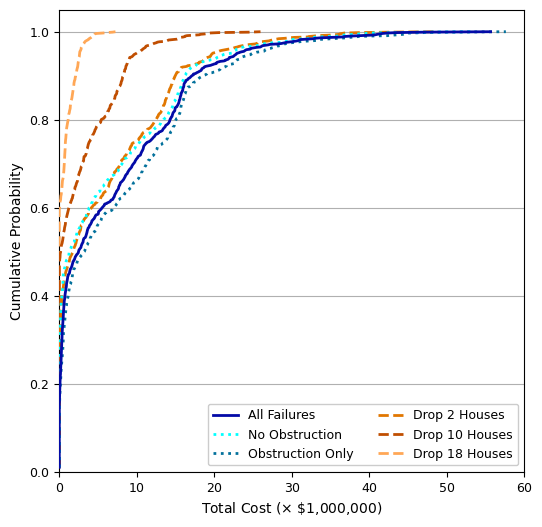

In [210]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax1 = Fig1.add_subplot(1,1,1)
# CDF
ov, = ax1.plot( npCDFOvTCt, probs, linestyle='-', linewidth=2, color='xkcd:cobalt blue', label="All Failures", zorder=12, )
noObs, = ax1.plot( npCDFOvNoObsTCt, probs, linestyle='dotted', linewidth=2, color='xkcd:cyan', label="No Obstruction", zorder=8, )
obs, = ax1.plot( npCDFOvObsTCt, probs, linestyle='dotted', linewidth=2, color='xkcd:ocean blue', label="Obstruction Only", zorder=7, )
d2, = ax1.plot( npCDFOvD2TCt, probs, linestyle='dashed', linewidth=2, color='xkcd:pumpkin', label="Drop 2 Houses", zorder=6, )
d10, = ax1.plot( npCDFOvD10TCt, probs, linestyle='dashed', linewidth=2, color='xkcd:burnt orange', label="Drop 10 Houses", zorder=5, )
d18, = ax1.plot( npCDFOvD18TCt, probs, linestyle='dashed', linewidth=2, color='xkcd:pale orange', label="Drop 18 Houses", zorder=4, )
ax1.set_ylabel( "Cumulative Probability", fontsize=10)
ax1.set_xlabel( r'Total Cost ($\times$ \$1,000,000)', fontsize=10)
ax1.set_xticks( TC_Ticks )
ax1.set_yticks( CProb_Ticks )
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( (TC_Ticks[0], TC_Ticks[len(TC_Ticks)-1]) )
ax1.set_ylim( (CProb_Ticks[0], 1.05) )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
leg = ax1.legend( loc="lower right", ncol=2, framealpha=1.0, fontsize=9)
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

In [211]:
DataDict = { "Quantiles" : probs,
             "All" : npCDFOvTCt,
             "No Obs" : npCDFOvNoObsTCt,
             "Obs Only" : npCDFOvObsTCt,
             "Drop 2" : npCDFOvD2TCt,
             "Drop 4" : npCDFOvD4TCt, 
             "Drop 6" : npCDFOvD6TCt, 
             "Drop 8" : npCDFOvD8TCt, 
             "Drop 10" : npCDFOvD10TCt, 
             "Drop 12" : npCDFOvD12TCt, 
             "Drop 14" : npCDFOvD14TCt, 
             "Drop 16" : npCDFOvD16TCt, 
             "Drop 18" : npCDFOvD18TCt, }

In [212]:
CDF01DF = pd.DataFrame( data=DataDict )

In [213]:
DataDict = { "Quantiles" : probs,
             "All Integrate": (npCDFOvTCt - 0.0), 
             "All-No_Obs" : (npCDFOvTCt - npCDFOvNoObsTCt),
             "All-Obs_Only" : (npCDFOvTCt - npCDFOvObsTCt),
             "All-Drop_2" : (npCDFOvTCt - npCDFOvD2TCt),
             "All-Drop_4" : (npCDFOvTCt - npCDFOvD4TCt), 
             "All-Drop_6" : (npCDFOvTCt - npCDFOvD6TCt), 
             "All-Drop_8" : (npCDFOvTCt - npCDFOvD8TCt), 
             "All-Drop_10" : (npCDFOvTCt - npCDFOvD10TCt), 
             "All-Drop_12" : (npCDFOvTCt - npCDFOvD12TCt), 
             "All-Drop_14" : (npCDFOvTCt - npCDFOvD14TCt), 
             "All-Drop_16" : (npCDFOvTCt - npCDFOvD16TCt), 
             "All-Drop_18" : (npCDFOvTCt - npCDFOvD18TCt), }

In [214]:
DiffCDF01DF = pd.DataFrame( data=DataDict )

In [215]:
All_Integrate = ((npCDFOvTCt - 0.0)*0.01).sum()
No_Obs_Integrate = ((npCDFOvNoObsTCt - 0.0)*0.01).sum()
Obs_Only_Integrate = ((npCDFOvObsTCt - 0.0)*0.01).sum()
Drop_2_Integrate = ((npCDFOvD2TCt - 0.0)*0.01).sum()
Drop_4_Integrate = ((npCDFOvD4TCt - 0.0)*0.01).sum()
Drop_6_Integrate = ((npCDFOvD6TCt - 0.0)*0.01).sum()
Drop_8_Integrate = ((npCDFOvD8TCt - 0.0)*0.01).sum()
Drop_10_Integrate = ((npCDFOvD10TCt - 0.0)*0.01).sum()
Drop_12_Integrate = ((npCDFOvD12TCt - 0.0)*0.01).sum()
Drop_14_Integrate = ((npCDFOvD14TCt - 0.0)*0.01).sum()
Drop_16_Integrate = ((npCDFOvD16TCt - 0.0)*0.01).sum()
Drop_18_Integrate = ((npCDFOvD18TCt - 0.0)*0.01).sum()
All_Integrate_List = [ All_Integrate, No_Obs_Integrate, Obs_Only_Integrate, Drop_2_Integrate, Drop_4_Integrate,
                       Drop_6_Integrate, Drop_8_Integrate, Drop_10_Integrate, Drop_12_Integrate, Drop_14_Integrate, 
                       Drop_16_Integrate, Drop_18_Integrate, ] 

In [216]:
All_less_No_Obs = ((npCDFOvTCt - npCDFOvNoObsTCt)*0.01).sum()
All_less_Obs_Only = ((npCDFOvTCt - npCDFOvObsTCt)*0.01).sum()
All_less_Drop_2 = ((npCDFOvTCt - npCDFOvD2TCt)*0.01).sum()
All_less_Drop_4 = ((npCDFOvTCt - npCDFOvD4TCt)*0.01).sum()
All_less_Drop_6 = ((npCDFOvTCt - npCDFOvD6TCt)*0.01).sum()
All_less_Drop_8 = ((npCDFOvTCt - npCDFOvD8TCt)*0.01).sum()
All_less_Drop_10 = ((npCDFOvTCt - npCDFOvD10TCt)*0.01).sum()
All_less_Drop_12 = ((npCDFOvTCt - npCDFOvD12TCt)*0.01).sum()
All_less_Drop_14 = ((npCDFOvTCt - npCDFOvD14TCt)*0.01).sum()
All_less_Drop_16 = ((npCDFOvTCt - npCDFOvD16TCt)*0.01).sum()
All_less_Drop_18 = ((npCDFOvTCt - npCDFOvD18TCt)*0.01).sum()
All_less_List = [ 0.0, All_less_No_Obs, All_less_Obs_Only, All_less_Drop_2, All_less_Drop_4, All_less_Drop_6, All_less_Drop_8,
                  All_less_Drop_10, All_less_Drop_12, All_less_Drop_14, All_less_Drop_16, All_less_Drop_18, ]

In [217]:
House_Cost_List = [ 44*0.75, 44*0.75, 44*0.75, 2*0.75, 4*0.75, 6*0.75, 8*0.75, 10*0.75, 12*0.75, 14*0.75, 
                    16*0.75, 18*0.75, ]

In [218]:
probs[242], probs[494], probs[747], probs[898]

(0.24981981981981985,
 0.4995495495495496,
 0.7502702702702704,
 0.8999099099099099)

In [219]:
Perc_25_List = [ npCDFOvTCt[242], npCDFOvNoObsTCt[242], npCDFOvObsTCt[242], npCDFOvD2TCt[242], npCDFOvD4TCt[242],
                 npCDFOvD6TCt[242], npCDFOvD8TCt[242], npCDFOvD10TCt[242], npCDFOvD12TCt[242], npCDFOvD14TCt[242],
                 npCDFOvD16TCt[242], npCDFOvD18TCt[242], ]

In [220]:
Perc_50_List = [ npCDFOvTCt[494], npCDFOvNoObsTCt[494], npCDFOvObsTCt[494], npCDFOvD2TCt[494], npCDFOvD4TCt[494],
                 npCDFOvD6TCt[494], npCDFOvD8TCt[494], npCDFOvD10TCt[494], npCDFOvD12TCt[494], npCDFOvD14TCt[494],
                 npCDFOvD16TCt[494], npCDFOvD18TCt[494], ]

In [221]:
Mean_List = [ npCDFOvTCt.mean(), npCDFOvNoObsTCt.mean(), npCDFOvObsTCt.mean(), npCDFOvD2TCt.mean(), npCDFOvD4TCt.mean(),
              npCDFOvD6TCt.mean(), npCDFOvD8TCt.mean(), npCDFOvD10TCt.mean(), npCDFOvD12TCt.mean(), npCDFOvD14TCt.mean(),
                 npCDFOvD16TCt.mean(), npCDFOvD18TCt.mean(), ]

In [222]:
Perc_75_List = [ npCDFOvTCt[747], npCDFOvNoObsTCt[747], npCDFOvObsTCt[747], npCDFOvD2TCt[747], npCDFOvD4TCt[747],
                 npCDFOvD6TCt[747], npCDFOvD8TCt[747], npCDFOvD10TCt[747], npCDFOvD12TCt[747], npCDFOvD14TCt[747],
                 npCDFOvD16TCt[747], npCDFOvD18TCt[747], ]

In [223]:
Perc_90_List = [ npCDFOvTCt[898], npCDFOvNoObsTCt[898], npCDFOvObsTCt[898], npCDFOvD2TCt[898], npCDFOvD4TCt[898],
                 npCDFOvD6TCt[898], npCDFOvD8TCt[898], npCDFOvD10TCt[898], npCDFOvD12TCt[898], npCDFOvD14TCt[898],
                 npCDFOvD16TCt[898], npCDFOvD18TCt[898], ]

In [224]:
Max_List = [ npCDFOvTCt.max(), npCDFOvNoObsTCt.max(), npCDFOvObsTCt.max(), npCDFOvD2TCt.max(), npCDFOvD4TCt.max(),
             npCDFOvD6TCt.max(), npCDFOvD8TCt.max(), npCDFOvD10TCt.max(), npCDFOvD12TCt.max(), npCDFOvD14TCt.max(),
             npCDFOvD16TCt.max(), npCDFOvD18TCt.max(), ]

In [225]:
DataDict = { "Integrated Total Possible Damage" : np.array( All_Integrate_List, dtype=np.float32 ),
             "Integrated Difference from All" : np.array( All_less_List, dtype=np.float32 ),
             "25th Percentile Cost" : np.array( Perc_25_List, dtype=np.float32 ),
             "50th Percentile Cost" : np.array( Perc_50_List, dtype=np.float32 ),
             "Mean Cost" : np.array( Mean_List, dtype=np.float32 ),
             "75th Percentile Cost" : np.array( Perc_75_List, dtype=np.float32 ),
             "90th Percentile Cost" : np.array( Perc_90_List, dtype=np.float32 ),
             "Max Cost" : np.array( Max_List, dtype=np.float32 ), 
             "House Removal Cost" : np.array( House_Cost_List, dtype=np.float32 ), }

In [226]:
CostCompSummDF = pd.DataFrame( index=[ "All", "No Obs", "Obs Only", "Drop 2", "Drop 4", "Drop 6", 
                                       "Drop 8", "Drop 10", "Drop 12", "Drop 14", "Drop 16", "Drop 18", ],
                               data=DataDict, )

In [227]:
#CostCompSummDF

In [228]:
display( HTML( CostCompSummDF.to_html() ) )

,Integrated Total Possible Damage,Integrated Difference from All,25th Percentile Cost,50th Percentile Cost,Mean Cost,75th Percentile Cost,90th Percentile Cost,Max Cost,House Removal Cost
All,67.253494,0.000000,0.223740,2.460809,6.725349,11.607048,17.098534,55.655994,33.0
No Obs,59.404987,7.848505,0.000000,1.272327,5.940498,10.429533,16.193218,53.687206,33.0
Obs Only,75.101723,-7.848231,0.325055,3.183085,7.510172,13.590126,18.638876,57.624783,33.0
Drop 2,56.884300,10.369190,0.024621,1.753149,5.688430,9.817706,14.960012,48.877010,1.5
Drop 4,47.607273,19.646219,0.000000,1.103874,4.760727,8.040999,13.053874,42.519592,3.0
Drop 6,39.435200,27.818289,0.000000,0.712957,3.943520,6.477160,11.427935,36.704746,4.5
Drop 8,32.112507,35.140984,0.000000,0.420949,3.211251,5.029879,9.850403,31.188416,6.0
Drop 10,25.546932,41.706558,0.000000,0.173396,2.554693,3.885217,8.251329,25.965193,7.5
Drop 12,19.642464,47.611027,0.000000,0.000000,1.964246,2.950479,6.637712,20.971769,9.0
Drop 14,14.380155,52.873337,0.000000,0.000000,1.438015,2.038464,5.040312,16.181658,10.5


In [229]:
LAQuants = np.array( [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, ], dtype=np.float32 )

In [230]:
DataDict = { "Deciles" : LAQuants,
             "All" : np.quantile( npOvTCt, LAQuants ), 
             "No Obs" : np.quantile( npOvNoObsTCt, LAQuants ),
             "Obs Only" : np.quantile( npOvObsTCt, LAQuants ),
             "Drop 2" : np.quantile( npOvD2TCt, LAQuants ),
             "Drop 4" : np.quantile( npOvD4TCt, LAQuants ), }

In [231]:
CompCDFDF = pd.DataFrame( data=DataDict )

In [232]:
display( HTML( CompCDFDF.to_html() ) )

,Deciles,All,No Obs,Obs Only,Drop 2,Drop 4
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.2,0.092359,0.000000,0.150025,0.000000,0.000000
3,0.3,0.336649,0.062940,0.517353,0.106697,0.000000
4,0.4,0.746345,0.358243,1.158242,0.381044,0.154238
5,0.5,2.460997,1.275181,3.231417,1.775760,1.116116
6,0.6,5.544086,3.848955,6.951493,4.120995,3.145188
7,0.7,9.579313,8.097360,11.263223,7.875709,6.359105
8,0.8,14.287159,13.450730,15.069685,12.494997,10.705576
9,0.9,17.107064,16.197583,18.641047,14.963319,13.054650


In [233]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR2, "Summary_Outputs.xlsx" ) )
writer = pd.ExcelWriter( OutFiler )
workbook  = writer.book
format1 = workbook.add_format({'num_format': '#,##0.00'})
format2 = workbook.add_format({'num_format': '#,##0.000'})
format3 = workbook.add_format({'num_format': '#,##0'})
cLabel = "House_Summary"
HouseSummDF.to_excel( writer, sheet_name=cLabel, )
# adjust columns
writer.sheets[cLabel].set_column( 0, 0, 8 )
for column in HouseSummDF:
    column_width = max(HouseSummDF[column].astype(str).map(len).max()+6, len(column)+6)
    col_idx = HouseSummDF.columns.get_loc(column)
    if column in ["House", "Count", "Row", "Column"]:
        writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format3)
    elif column in ["Total Cost", "XCoord (m)", "YCoord (m)", "Topo (m)", "Initial Depth (m)"]:
        writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format1)
    else:
        writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format2)
    # end if
# end for
cLabel = "Scenario_Summary"
CostCompSummDF.to_excel( writer, sheet_name=cLabel, )
writer.sheets[cLabel].set_column( 0, 0, 8 )
for column in CostCompSummDF:
    column_width = max(CostCompSummDF[column].astype(str).map(len).max()+6, len(column)+6)
    col_idx = CostCompSummDF.columns.get_loc(column)
    writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format2)
# end for
cLabel = "Decile_CDF_Table"
CompCDFDF.to_excel( writer, sheet_name=cLabel, )
writer.sheets[cLabel].set_column( 0, 0, 8 )
for column in CompCDFDF:
    column_width = max(CompCDFDF[column].astype(str).map(len).max()+6, len(column)+6)
    col_idx = CompCDFDF.columns.get_loc(column)
    writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format2)
# end for
cLabel = "Quantile_CDF_Table"
CDF01DF.to_excel( writer, sheet_name=cLabel, )
writer.sheets[cLabel].set_column( 0, 0, 8 )
for column in CDF01DF:
    column_width = max(CDF01DF[column].astype(str).map(len).max()+6, len(column)+6)
    col_idx = CDF01DF.columns.get_loc(column)
    writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format2)
# end for
cLabel = "Quantile_Differences"
DiffCDF01DF.to_excel( writer, sheet_name=cLabel, )
writer.sheets[cLabel].set_column( 0, 0, 8 )
for column in DiffCDF01DF:
    column_width = max(DiffCDF01DF[column].astype(str).map(len).max()+6, len(column)+6)
    col_idx = DiffCDF01DF.columns.get_loc(column)
    writer.sheets[cLabel].set_column(col_idx+1, col_idx+1, column_width, format2)
# end for
writer.close()

## Process Select Inundation Results

### No Obstruction Cases

Do two no obstruction cases
1. Historical 100-year event depth of 233.7 (use 236) and discharge of 180.0 cms
2. Current 100-year event depth of 343 mm and discharge of 261.6 cms

In [234]:
InFiler = os.path.normpath( os.path.join( IN_DIR5, "H.txt" ) )
H1Array = np.loadtxt( InFiler, dtype=np.float32, )
H1Array.shape

(14000,)

In [235]:
H1Array = np.where( H1Array <= DEPTH_CUTOFF, 0.0, H1Array )

In [236]:
HOrg = np.reshape( H1Array, (NUMROWS, NUMCOLS), order='C' ).copy()
HOrg.shape

(200, 70)

In [237]:
HOrg.max(), HOrg.min()

(8.069489, 0.0)

In [238]:
InFiler = os.path.normpath( os.path.join( IN_DIR6, "H.txt" ) )
H2Array = np.loadtxt( InFiler, dtype=np.float32, )
H2Array.shape

(14000,)

In [239]:
H2Array = np.where( H2Array <= DEPTH_CUTOFF, 0.0, H2Array )

In [240]:
HNew = np.reshape( H2Array, (NUMROWS, NUMCOLS), order='C' ).copy()
HNew.shape

(200, 70)

In [241]:
HNew.max(), HNew.min()

(11.247252, 0.0)

In [242]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-SimWL_NoObs_2Cases.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-SimWL_NoObs_2Cases.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-SimWL_NoObs_2Cases.svg" ) )

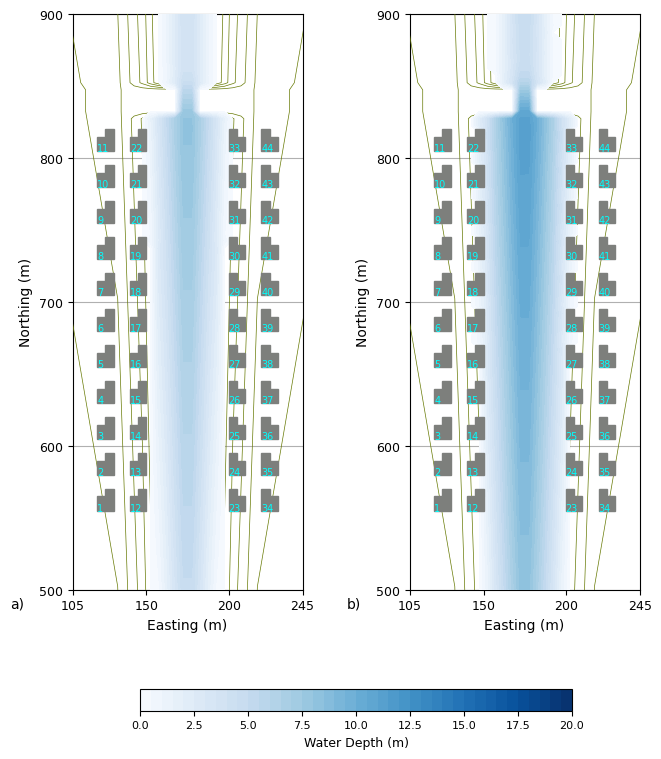

In [243]:
Fig1 = plt.figure(figsize=( 6.5, (19.0/2.54)), layout="constrained", )
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[12, 1], width_ratios=[1,1], wspace=0.05,
                           hspace=0.02, figure=Fig1, )
ax1 = Fig1.add_subplot(gs[0,0])
wl1 = ax1.contourf( XV, YV, HOrg, levels=CLevels, cmap='Blues', vmin=0.01, vmax=20.0, zorder=20.0)
tp1 = ax1.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0, )
t1 = ax1.clabel(tp2, tp2.levels, inline=True, fmt="%d", fontsize=7 )
ax1.set_ylabel( "Northing (m)", fontsize=10)
ax1.set_xlabel( "Easting (m)", fontsize=10)
ax1.set_xticks( ZmX )
ax1.set_yticks( ZmY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    zAnno = pCnt + 50.0
    pX, pY = tPoly.exterior.xy
    cCCoords = tPoly.representative_point().coords[:][0]
    labelstr = "%d" % (pCnt+1)
    bldPoly = ax1.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0,
                        label="House")
    ax1.text( cCCoords[0]-5.0, cCCoords[1]-5.0, labelstr, color='xkcd:cyan', fontsize=7, fontweight='normal', zorder=zAnno )
    pCnt += 1
# end for
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( (ZmX[0], ZmX[len(ZmX)-1]) )
ax1.set_ylim( (ZmY[0], ZmY[len(ZmY)-1]) )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# now do the second one
ax2 = Fig1.add_subplot(gs[0,1])
wl2 = ax2.contourf( XV, YV, HNew, levels=CLevels, cmap='Blues', vmin=0.01, vmax=20.0, zorder=20.0)
tp2 = ax2.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0, )
t2 = ax2.clabel(tp2, tp2.levels, inline=True, fmt="%d", fontsize=7 )
ax2.set_ylabel( "Northing (m)", fontsize=10)
ax2.set_xlabel( "Easting (m)", fontsize=10)
ax2.set_xticks( ZmX )
ax2.set_yticks( ZmY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    zAnno = pCnt + 50.0
    pX, pY = tPoly.exterior.xy
    cCCoords = tPoly.representative_point().coords[:][0]
    labelstr = "%d" % (pCnt+1)
    bldPoly = ax2.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0,
                        label="House")
    ax2.text( cCCoords[0]-5.0, cCCoords[1]-5.0, labelstr, color='xkcd:cyan', fontsize=7, fontweight='normal', zorder=zAnno )
    pCnt += 1
# end for
ax2.grid( visible=True, which='major', axis='y' )
ax2.set_xlim( (ZmX[0], ZmX[len(ZmX)-1]) )
ax2.set_ylim( (ZmY[0], ZmY[len(ZmY)-1]) )
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# now do legend
ax3 = Fig1.add_subplot(gs[1,:])
cb = plt.colorbar( wl2, ax=ax3, orientation='horizontal', location='bottom', fraction=0.45, pad=0.01)
cb.ax.tick_params(labelsize=8)
cb.set_label( 'Water Depth (m)', fontsize=9 )
ta = ax3.axis('off')
# add subplot ids
trans11 = mtransforms.ScaledTranslation(-45/72, -(5.7*75)/72, Fig1.dpi_scale_trans)
txt11 = ax1.text(0.0, 1.0, "a)", transform=ax1.transAxes+trans11, fontsize=10 )
trans22 = mtransforms.ScaledTranslation(-45/72, -(5.7*75)/72, Fig1.dpi_scale_trans)
txt22 = ax2.text(0.0, 1.0, "b)", transform=ax2.transAxes+trans22, fontsize=10 )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )

### With Obstruction

There are also two with obstruction cases.
1. A historical design event, 237 mm ~ 180.8 m3/s, with an obstruction height of 4.9 m.
    - This example shows an example of the magnitude of obstruction required for flooding under compliant conditions.
2. Maximum simulated inundation event, 572.5 mm ~ 436.7 m3/s, with an obstruction height of 19.9 m
    - Shows maximum inundation simulated as part of failure assessment.

In [244]:
InFiler = os.path.normpath( os.path.join( IN_DIR7, "H.txt" ) )
H3Array = np.loadtxt( InFiler, dtype=np.float32, )
H3Array.shape

(14000,)

In [245]:
H3Array = np.where( H3Array <= DEPTH_CUTOFF, 0.0, H3Array )

In [246]:
HObsOrg = np.reshape( H3Array, (NUMROWS, NUMCOLS), order='C' ).copy()
HObsOrg.shape

(200, 70)

In [247]:
HObsOrg.max(), HObsOrg.min()

(9.362334, 0.0)

In [248]:
InFiler = os.path.normpath( os.path.join( IN_DIR8, "H.txt" ) )
H4Array = np.loadtxt( InFiler, dtype=np.float32, )
H4Array.shape

(14000,)

In [249]:
H4Array = np.where( H4Array <= DEPTH_CUTOFF, 0.0, H4Array )

In [250]:
HObsMax = np.reshape( H4Array, (NUMROWS, NUMCOLS), order='C' ).copy()
HObsMax.shape

(200, 70)

In [251]:
HObsMax.max(), HObsMax.min()

(15.579289, 0.0)

In [252]:
OutFilePNG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-SimWL_Obs_2Cases.png" ) )
OutFilePDF = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-SimWL_Obs_2Cases.pdf" ) )
OutFileSVG = os.path.normpath( os.path.join( OUT_DIR, "Fig-XX-SimWL_Obs_2Cases.svg" ) )

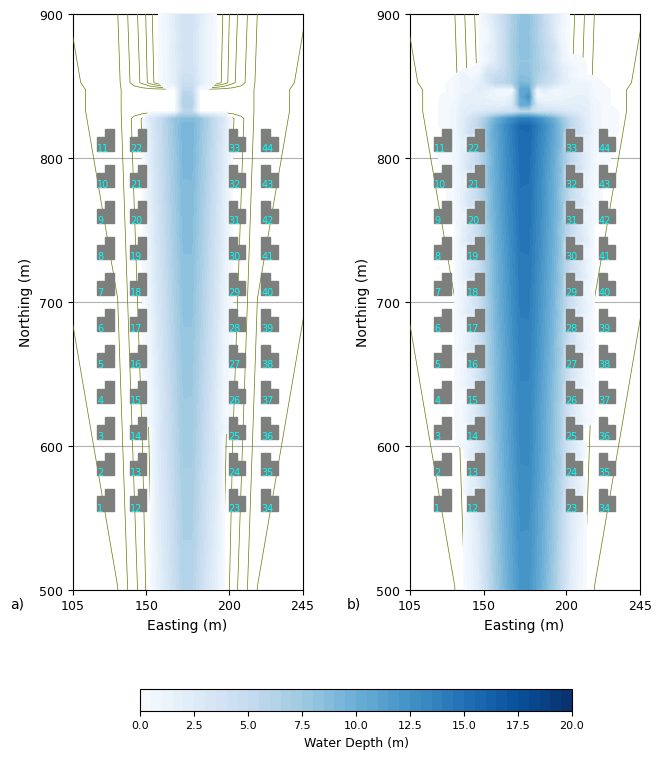

In [253]:
Fig1 = plt.figure(figsize=( 6.5, (19.0/2.54)), layout="constrained", )
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[12, 1], width_ratios=[1,1], wspace=0.05,
                           hspace=0.02, figure=Fig1, )
ax1 = Fig1.add_subplot(gs[0,0])
wl1 = ax1.contourf( XV, YV, HObsOrg, levels=CLevels, cmap='Blues', vmin=0.01, vmax=20.0, zorder=20.0)
tp1 = ax1.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0, )
t1 = ax1.clabel(tp2, tp2.levels, inline=True, fmt="%d", fontsize=7 )
ax1.set_ylabel( "Northing (m)", fontsize=10)
ax1.set_xlabel( "Easting (m)", fontsize=10)
ax1.set_xticks( ZmX )
ax1.set_yticks( ZmY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    zAnno = pCnt + 50.0
    pX, pY = tPoly.exterior.xy
    cCCoords = tPoly.representative_point().coords[:][0]
    labelstr = "%d" % (pCnt+1)
    bldPoly = ax1.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0,
                        label="House")
    ax1.text( cCCoords[0]-5.0, cCCoords[1]-5.0, labelstr, color='xkcd:cyan', fontsize=7, fontweight='normal', zorder=zAnno )
    pCnt += 1
# end for
ax1.grid( visible=True, which='major', axis='y' )
ax1.set_xlim( (ZmX[0], ZmX[len(ZmX)-1]) )
ax1.set_ylim( (ZmY[0], ZmY[len(ZmY)-1]) )
ax1.tick_params(axis='both', which='major', labelsize=9)
ax1.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# now do the second one
ax2 = Fig1.add_subplot(gs[0,1])
wl2 = ax2.contourf( XV, YV, HObsMax, levels=CLevels, cmap='Blues', vmin=0.01, vmax=20.0, zorder=20.0)
tp2 = ax2.contour( XV, YV, Topo, levels=TLevels, colors='xkcd:olive green', linestyles='-', 
                   linewidths=0.5, vmin=90.0, vmax=124.0, zorder=10.0, )
t2 = ax2.clabel(tp2, tp2.levels, inline=True, fmt="%d", fontsize=7 )
ax2.set_ylabel( "Northing (m)", fontsize=10)
ax2.set_xlabel( "Easting (m)", fontsize=10)
ax2.set_xticks( ZmX )
ax2.set_yticks( ZmY )
pCnt = 0
for tPoly in Building_Polys:
    zLev = pCnt + 25.0
    zAnno = pCnt + 50.0
    pX, pY = tPoly.exterior.xy
    cCCoords = tPoly.representative_point().coords[:][0]
    labelstr = "%d" % (pCnt+1)
    bldPoly = ax2.fill( pX, pY, edgecolor='xkcd:medium grey', facecolor='xkcd:medium grey', linewidth=1, zorder=zLev, alpha=1.0,
                        label="House")
    ax2.text( cCCoords[0]-5.0, cCCoords[1]-5.0, labelstr, color='xkcd:cyan', fontsize=7, fontweight='normal', zorder=zAnno )
    pCnt += 1
# end for
ax2.grid( visible=True, which='major', axis='y' )
ax2.set_xlim( (ZmX[0], ZmX[len(ZmX)-1]) )
ax2.set_ylim( (ZmY[0], ZmY[len(ZmY)-1]) )
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# now do legend
ax3 = Fig1.add_subplot(gs[1,:])
cb = plt.colorbar( wl2, ax=ax3, orientation='horizontal', location='bottom', fraction=0.45, pad=0.01)
cb.ax.tick_params(labelsize=8)
cb.set_label( 'Water Depth (m)', fontsize=9 )
ta = ax3.axis('off')
# add subplot ids
trans11 = mtransforms.ScaledTranslation(-45/72, -(5.7*75)/72, Fig1.dpi_scale_trans)
txt11 = ax1.text(0.0, 1.0, "a)", transform=ax1.transAxes+trans11, fontsize=10 )
trans22 = mtransforms.ScaledTranslation(-45/72, -(5.7*75)/72, Fig1.dpi_scale_trans)
txt22 = ax2.text(0.0, 1.0, "b)", transform=ax2.transAxes+trans22, fontsize=10 )
#Fig1.savefig( OutFilePNG, dpi=600 )
#Fig1.savefig( OutFilePDF, dpi=600 )
#Fig1.savefig( OutFileSVG, dpi=600 )